# 항공사 고객 만족도 예측 경진대회

## 패키지 import 및 데이터 전처리

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

sns.set_theme()

In [2]:
pd.set_option('display.max_columns', None) ## 컬럼 전체를 출력하도록 설정

In [3]:
df = pd.read_csv('C:/Users/Jaesu/github_desktop/Dacon-Basic/항공사-고객만족도-예측/Data/train.csv')

In [4]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
0,1,Female,disloyal Customer,22,Business travel,Eco,1599,3,0,3,3,4,3,4,4,5,4,4,4,5,4,0,0.0,0
1,2,Female,Loyal Customer,37,Business travel,Business,2810,2,4,4,4,1,4,3,5,5,4,2,1,5,2,18,18.0,0
2,3,Male,Loyal Customer,46,Business travel,Business,2622,1,1,1,1,4,5,5,4,4,4,4,5,4,3,0,0.0,1
3,4,Female,disloyal Customer,24,Business travel,Eco,2348,3,3,3,3,3,3,3,3,2,4,5,3,4,3,10,2.0,0
4,5,Female,Loyal Customer,58,Business travel,Business,105,3,3,3,3,4,4,5,4,4,4,4,4,4,5,0,0.0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 3000 non-null   int64  
 1   Gender                             3000 non-null   object 
 2   Customer Type                      3000 non-null   object 
 3   Age                                3000 non-null   int64  
 4   Type of Travel                     3000 non-null   object 
 5   Class                              3000 non-null   object 
 6   Flight Distance                    3000 non-null   int64  
 7   Seat comfort                       3000 non-null   int64  
 8   Departure/Arrival time convenient  3000 non-null   int64  
 9   Food and drink                     3000 non-null   int64  
 10  Gate location                      3000 non-null   int64  
 11  Inflight wifi service              3000 non-null   int64

`-` 행은 3000개, 컬럼은 23개이며 결측치는 없다(온라인 설문조사니까 응답을 안하면 제출이 안되서 그런듯)

|컬럼명|세부사항|
|:-:|:-:|
|id | 샘플 아이디|
|Gender | 성별|
|Customer Type | Disloyal 또는 Loyal 고객|
|Age | 나이|
|Type of Travel | Business 또는 Personal Travel
|Class | 등급|
|Flight Distance | 비행 거리|
|Seat comfort | 좌석 만족도|
|Departure/Arrival time convenient | 출발/도착 시간 편의성 만족도|
|Food and drink | 식음료 만족도|
|Gate location | 게이트 위치 만족도|
|Inflight wifi service | 기내 와이파이 서비스 만족도|
|Inflight entertainment | 기내 엔터테인먼트 만족도|
|Online support |온라인 지원 만족도|
|Ease of Online booking| 온라인 예매 편리성 만족도|
|On-board service | 탑승 서비스 만족도|
|Leg room service | Leg room 서비스 만족도|
|Baggage handling | 수하물 처리 만족도|
|Checkin service | 체크인 서비스 만족도|
|Cleanliness | 청결도 만족도|
|Online boarding | 온라인보딩 만족도|
|Departure Delay in Minutes | 출발 지연 시간|
|Arrival Delay in Minutes | 도착 지연 시간|
|target | 만족 여부|

In [6]:
df.describe()

,id,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,39.203000,1983.079333,2.863333,3.009667,2.874333,3.016667,3.259667,3.352333,3.50500,3.488000,3.497000,3.485000,3.728667,3.370000,3.728667,3.356333,15.634333,15.922000,0.556000
std,866.169729,15.108802,1028.109117,1.394981,1.519543,1.431511,1.294713,1.322683,1.352826,1.31068,1.302211,1.283436,1.294218,1.154190,1.258158,1.161678,1.294057,45.083228,45.203411,0.496937
min,1.000000,7.000000,52.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.00000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,750.750000,27.000000,1348.250000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.00000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,1500.500000,39.000000,1937.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000,1.000000
75%,2250.250000,51.000000,2547.250000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.00000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,3000.000000,80.000000,6882.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.000000,1115.000000,1.000000


`-` 만족 55%, 불만족 45% 이다

`-` 만족도 수치가 크면 좋은건가?

`-` 만족도 수치가 크면 좋은 것 같긴하다

`-` 첫 번째 행을 보면 비행기 딜레이도 없고 만족도 수치도 대체로 높은데 불만족(0)이다 

`-` 그리고 비행기 딜레이가 없는데 출발/도착 시간 편의성 만족도는 0점이다... 뭐지?

In [7]:
df.drop('id', axis = 1, inplace = True) ## id는 필요없으니 제거

`-` 나이는 범주화 시키겠다

In [8]:
def categorize_age(age):
    for i in range(1, 9):  ## 나이의 최대값은 80
        if age <= i*10:
            return str((i-1)*10 + 1) + '~' + str(i*10)

In [9]:
df['Age'] = df['Age'].apply(lambda x: categorize_age(x)) 

In [10]:
df['Age'].value_counts()

41~50    650
31~40    628
21~30    612
51~60    542
11~20    266
61~70    208
1~10      74
71~80     20
Name: Age, dtype: int64

`-` 1\~10과 71\~80은 표본이 적은 관계로 다른 범주와 통합시키겠다

In [11]:
df['Age'] = df['Age'].apply(lambda x: '11~20' if x == '1~10' else ('61~70' if x == '71~80' else x))

In [12]:
df['Age'] = pd.Categorical(df['Age'], [str((i-1)*10 + 1) + '~' + str(i*10) for i in range(2, 8)])

## 데이터 EDA

### 범주형 변수 시각화

`-` 비행 거리, 출발 지연 시간, 도착 지연 시간을 제외하면 모두 범주형 변수이다

`-` 간단하게 빈도를 확인하자

In [13]:
numeric_features = ['Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'target']

In [14]:
categorical_features = list(set(df.columns.tolist()) - set(numeric_features))

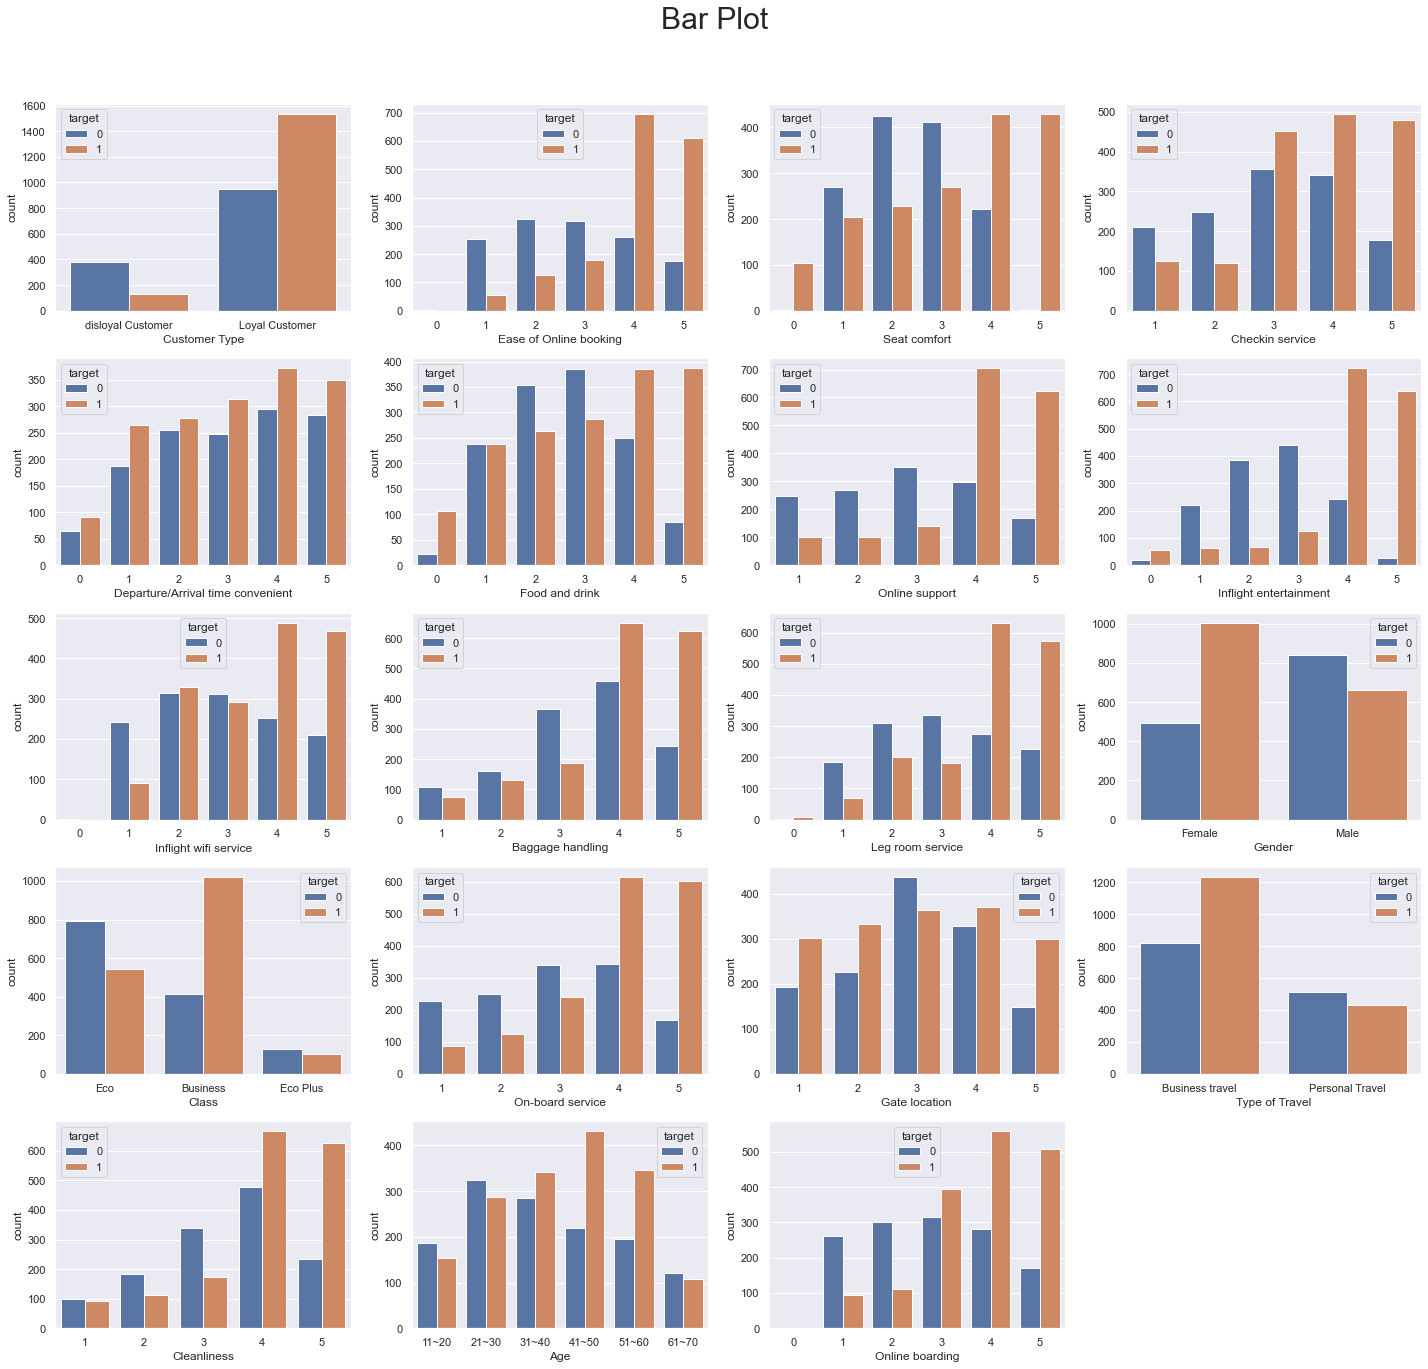

In [133]:
## 히스토그램을 사용해 범주의 빈도 확인
features = categorical_features

plt.figure(figsize = (20,20))
plt.suptitle('Bar Plot', fontsize = 30)

for i, feature in enumerate(features):
    plt.subplot(5,4,i+1)
    sns.countplot(x = feature, hue = 'target', data = df) 

plt.tight_layout(rect = [0, 0.03, 1, 0.95])
plt.show()

`-` 고객 타입은 충성 고객(만족 비율 높음)이 월등히 많다(일반 고객(만족 비율 낮음)은 비율이 적음)

`-` 나이가 41~60인 경우 만족 비율이 높다

`-` 남자와 여자(만족 비율 높음) 비율은 반반이다

`-` 탑승 서비스 만족도 긍정, 부정이 거의 반반이다

`-` 비행기 좌석은 비즈니스(만족 비율 높음)와 이코노미가 반반이고 이코노미 플러스 등급이 약간의 비율을 차지한다

`-` 여행 타입은 비스니스가 퍼스널(보통은 여행인 듯)보다 2배 많다

`-` 만족도 관련 피쳐는 대칭인 분포이거나 높은 점수에 치우친 분포이다

`-` 만족도 피쳐에서 일정 점수보다 낮다면 불만족이 만족보다 비율이 높아진다(당연한 소리)

`-` 기내 엔터테이먼트 만족도가 3이하이면 거의 불만족, 좌석 만족도가 5점이면 100% 만족?!, 음식음료 만족도가 5점이면 거의 만족 등등

- 아래는 나의 생각

`-` 내 생각엔 진짜 불편한거 아니면 대체로 점수를 잘 주려고 할 것임(굳이 나쁘게 주지는 않을 듯)

`-` 좌석의 경우 비행기 타는 내내 감내해야 하기에 매우 중요함

`-` 근데 이제 대칭인 분포를 띄는 피쳐(낮은 점수, 높은 점수 골고루 있음)는 진짜 불편해서(낮게 주지 않으려는 경향이 있을 것 같지만) 낮은 점수를 준 것 

`-` 딱히 큰 일 없으면 점수를 잘 주려는 사람도 딜레이같이 진짜 불편한 것은 낮은 점수를 과감히 준다는 것

`-` 비행기 고객만족도 설문은 강제가 아님 ---> 하고 싶은 사람(보상이 있든지 그냥 하든지...)만 하기에 편의 표본이다

`-` 일단 그냥 하는 사람 ---> 낮은 점수주거나 높은 점수 준다(평범한 점수를 주는데 굳이 귀찮게 설문을 할까?)

`-` 보상 때문에 하는 사람 ---> 굳이 할 생각이 없었는데 보상 때문에 한다면 보상이 없을 때 줄 점수보단 좋은 점수를 줄 것

`-` 이를 확인해보자

In [15]:
service_features =\
list(set(df.columns.tolist()) -\
{'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'target'})

In [16]:
df.insert(22, 'Avg_service', df[service_features].sum(axis = 1) / len(service_features))

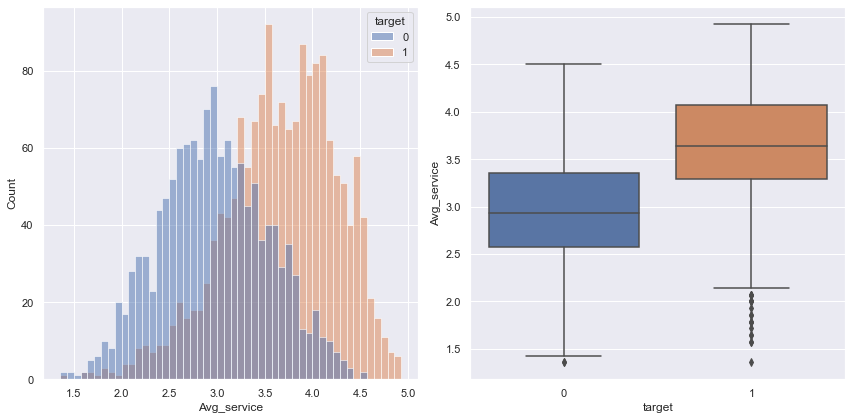

In [23]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12, 6))
sns.histplot(x = 'Avg_service', hue = 'target', binwidth = 1/len(service_features), ax = ax1, data = df)
sns.boxplot(y = 'Avg_service', x = 'target', ax = ax2, data = df)
fig.tight_layout()

`-` 불만족한 사람인 경우 전체 만족도 점수 평균의 분포는 종모양인 반면

`-` 만족한 사람인 경우 오른쪽으로 치우친(왼쪽으로 꼬리가 긴) 분포이다

`-` 내 추측은 틀린 듯...

- 점수에 대한 나의 느낌

`-` 3점 : 그냥 그럼...

`-` 4점 : 나쁘지는 않네

`-` 5점 : 만족했다

#### 만족도 miss marking

`-` 그런데 막대그래프를 보면 매우 이상점 곳이 존재한다

`-` 정상적인 만족도 피쳐라면 4점이 5점보다 count는 많되 5점일 때가 만족인 비율이 더 높아야 함(점수가 낮은 경우에도 같은 매커니즘)

`-` 좌석 만족도는 승객의 만족/불만족과 강한 연관이 존재한다(5점이면 99% 만족!, 높은 점수일수록 만족한 비율이 높음)

`-` 그런데 좌석 만족도 점수가 0점인데 만족이 99% 이다??

`-` 이런 경우는 좌석 만족도에만 존재하지 않는다

`-` 음식/음료 만족도와 기내 엔터테이먼트 만족도와 출발/도착 시간 편의성(이건 그럴만 하긴 하다)에도 존재한다

`-` 그런데 보통 만족도 설문지를 보면 1\~5점까지 존재하는데 0점은 뭘까?

`-` 혹시 5점이 매우 만족인데 0점을 매우 만족으로 착각한 것일까?(나도 그런적이 있다)

`-` 만약 그렇다면 좌석 만족도에서 1점일 때가 2, 3점일 때보다 만족한 비율이 높은점도 설명 가능하다(좌석 만족도 뿐만 아니라 비슷한 만족도 피쳐도 마찬가지)

`-` 그게 아니라면 만족/불만족을 miss marking 한 것이다

`-` 근데 만족/불만족 miss marking은 뭔가 이상하다

`-` 만족/불만족을 잘못 선택하는건 50%(?)는 아닌데 아무튼 실수이다

`-` 그런데 왜 만족/불만족 선택 실수는 좌석 만족도 0점주고 1점 준 사람들만 하는거지?(표본크기도 작지 않다)

`-` 그렇게 따지면 좌석 만족도 5점 준 사람도 만족/불만족 선택 실수하고 다른 점수를 준 경우에도 실수는 할 수 있다(서로 독립이니까)

`-` 좌석 만족도 0점준다고 만족/불만족 선택 실수를 더 많이 할 이유는 없다(내 생각엔)

`-` 그러니 포커스는 좌석 만족도를 잘못 선택했다는 것에 두자

##### 좌석 만족도

<AxesSubplot:>

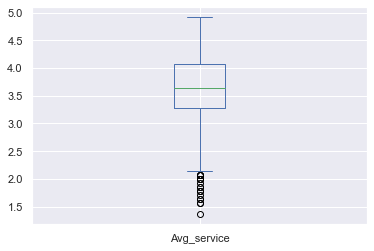

In [217]:
df.query('target == 1').Avg_service.plot.box() ## 만족한 사람들의 평균 만족도 점수 ## 대략 중심이 3.7점

In [178]:
sum(df['Seat comfort'] == 0) ## 좌석 만족도가 0점인 사람은 106명

106

In [179]:
sum(df.loc[df['Seat comfort'] == 0,'target'])## 좌석 만족도가 0점인 사람은 106명이고 그 중 105명이 만족한다

105

`-` 좌석 만족도가 0점인 사람은 다른 만족도 점수는 어떻게 부여했는지 확인하자

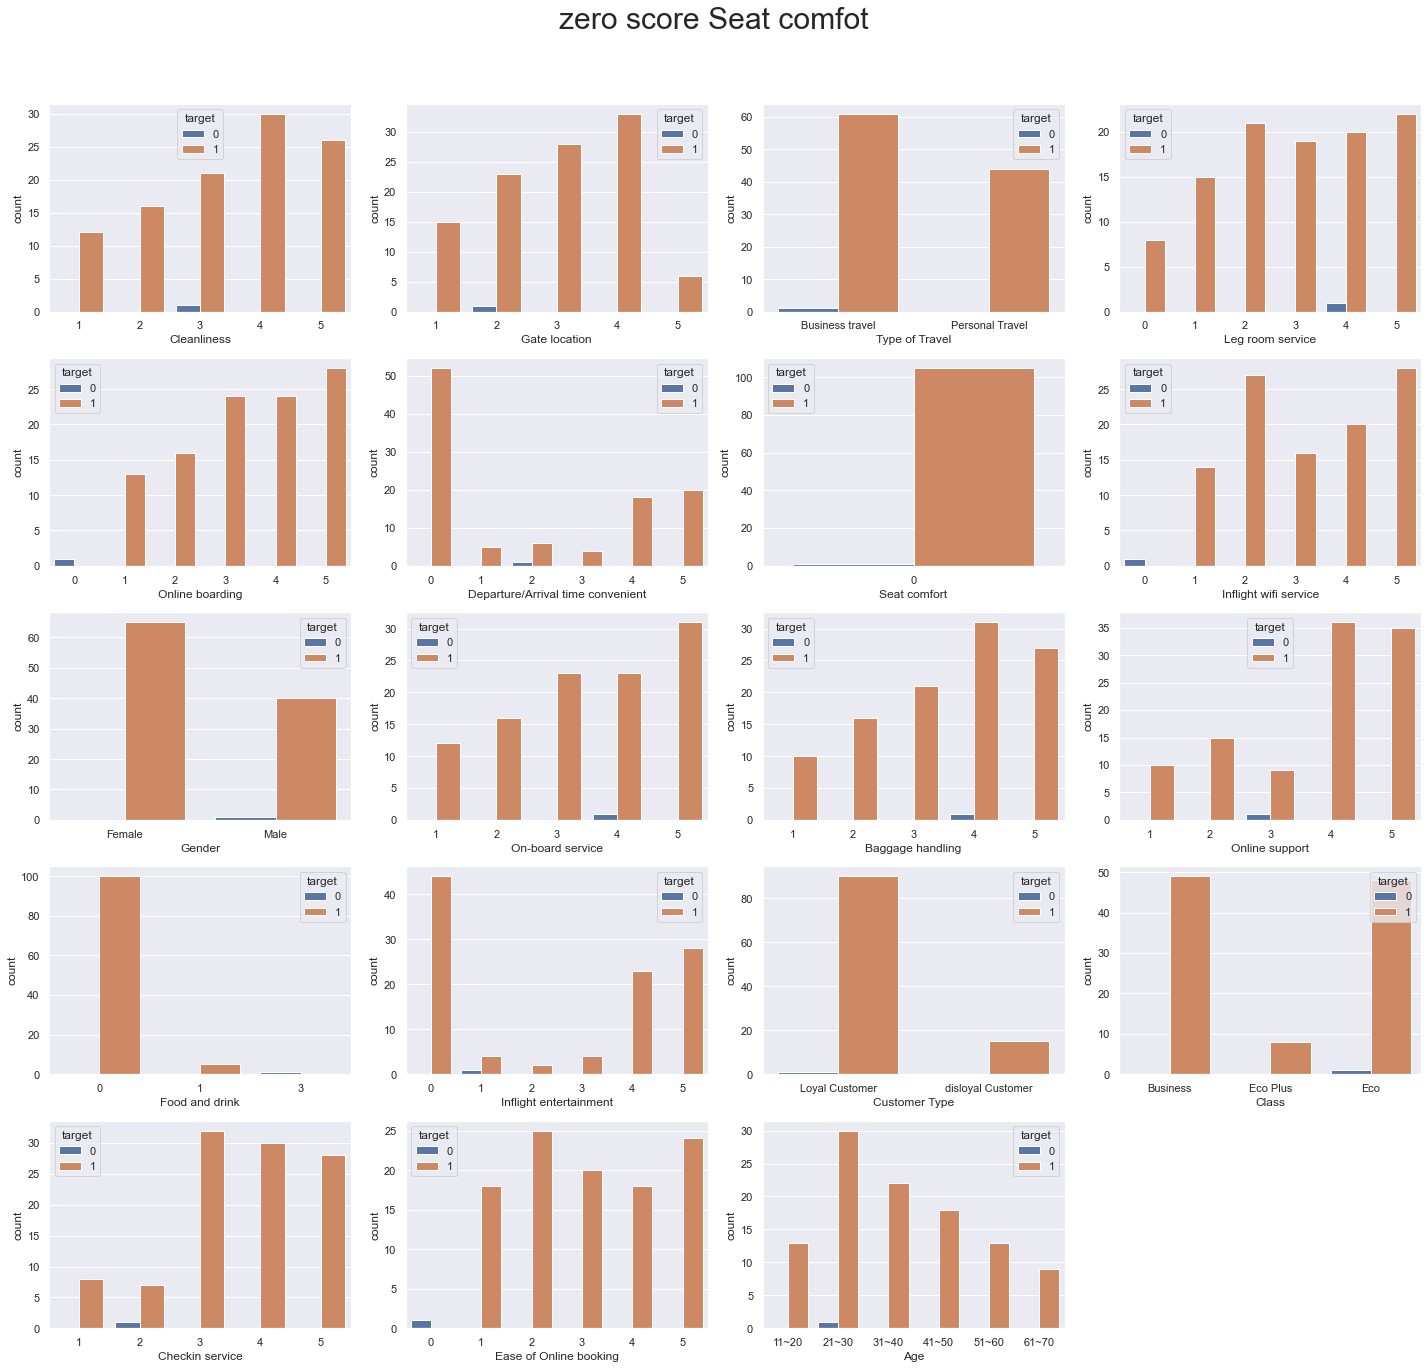

In [19]:
## 히스토그램을 사용해 범주의 빈도 확인
features = categorical_features

plt.figure(figsize = (20,20))
plt.suptitle('zero score Seat comfot', fontsize = 30)

for i, feature in enumerate(features):
    plt.subplot(5,4,i+1)
    sns.countplot(x = feature, hue = 'target', data = df[df['Seat comfort'] == 0]) 

plt.tight_layout(rect = [0, 0.03, 1, 0.95])
plt.show()

- 좌석 만족도가 0점인데 만족한 사람의 경향이 대강 보인다(miss marking)

`-` 출발/도착 시간 만족도도 대개 0점을 준다

`-` 기내 엔터테이먼트 만족도도 대개 0점을 준다

`-` 음식/음료 만족도도 대개 0점을 준다

`-` 기내 와이파이 만족도와 온라인 예매 편리성 만족도가 2점인 경우가 꽤 많다(추세에 맞지 않는다)

`-` 체크인 서비스 만족도도 의심이 간다

`-` 나이대는 21\~30이 가장 많음

- 좌석 만족도가 0점인데 불만족인 사람은 진짜로 불만족인 것

`-` 다른 만족도 점수도 낮은편이다(높은 점수도 있음)

<AxesSubplot:>

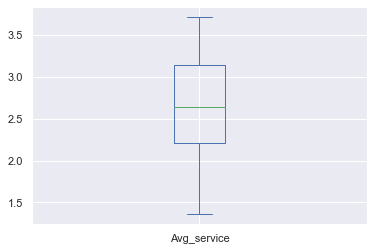

In [216]:
df.loc[df['Seat comfort'] == 0,:].query('target == 1').Avg_service.plot.box() ## 좌석 만족도가 0점인데 만족한 사람

`-` 위의 평균 만족도 점수 박스플랏을 보면 좌석 점수는 진짜 안좋았지만 다른 퀄리티가 좋아서 만족한 것이 아님을 대강 알 수 있다

`-` 만족한 사람들의 평균 만족도 점수는 대략 중심이 3.7점인데 위의 경우는 중심이 2.7점이다

In [226]:
df[df['Seat comfort'] == 0]['Inflight entertainment'].unique()

array([5, 0, 2, 4, 1, 3], dtype=int64)

In [194]:
df[df['Seat comfort'] == 0]['Food and drink'].unique()

array([0, 1, 3], dtype=int64)

In [193]:
sum(df[df['Seat comfort'] == 0]['Food and drink'] == 0), sum(df[df['Seat comfort'] == 0]['Food and drink'] == 1),  sum(df[df['Seat comfort'] == 0]['Food and drink'] == 3)

(100, 5, 1)

`-` 좌석 만족도가 0점인 사람은 106명이 있는데 이중에서 100명이 음식/음료 만족도도 0점이고 

`-` 5명은 1점, 1명은 3점(좌석 만족도 0점인 사람 중 유일하게 불만족)이다

##### 음식/음료 만족도

In [182]:
sum(df['Food and drink'] == 0) ## 음식/음료 만족도가 0점인 사람은 129명

129

In [184]:
sum(df.loc[df['Food and drink'] == 0,'target'])## 음식/음료 만족도가 0점인 사람은 129명이고 그 중 107명이 만족한다

107

In [224]:
df[df['Food and drink'] == 0]['Seat comfort'].unique()

array([0, 2, 4, 1, 3, 5], dtype=int64)

In [225]:
df[df['Food and drink'] == 0]['Inflight entertainment'].unique()

array([5, 0, 2, 4, 1, 3], dtype=int64)

<AxesSubplot:>

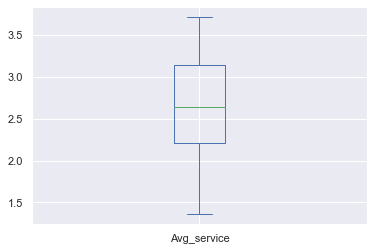

In [218]:
df.loc[df['Food and drink'] == 0,:].query('target == 1').Avg_service.plot.box() ## 음식/음료 만족도가 0점인데 만족한 사람

<AxesSubplot:>

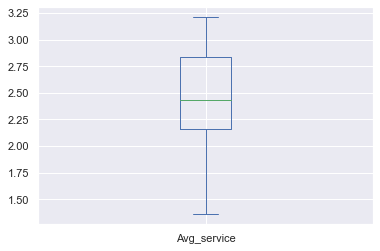

In [242]:
df.loc[df['Food and drink'] == 0,:].query('target == 0').Avg_service.plot.box() ## 음식/음료 만족도가 0점인데 불만족한 사람

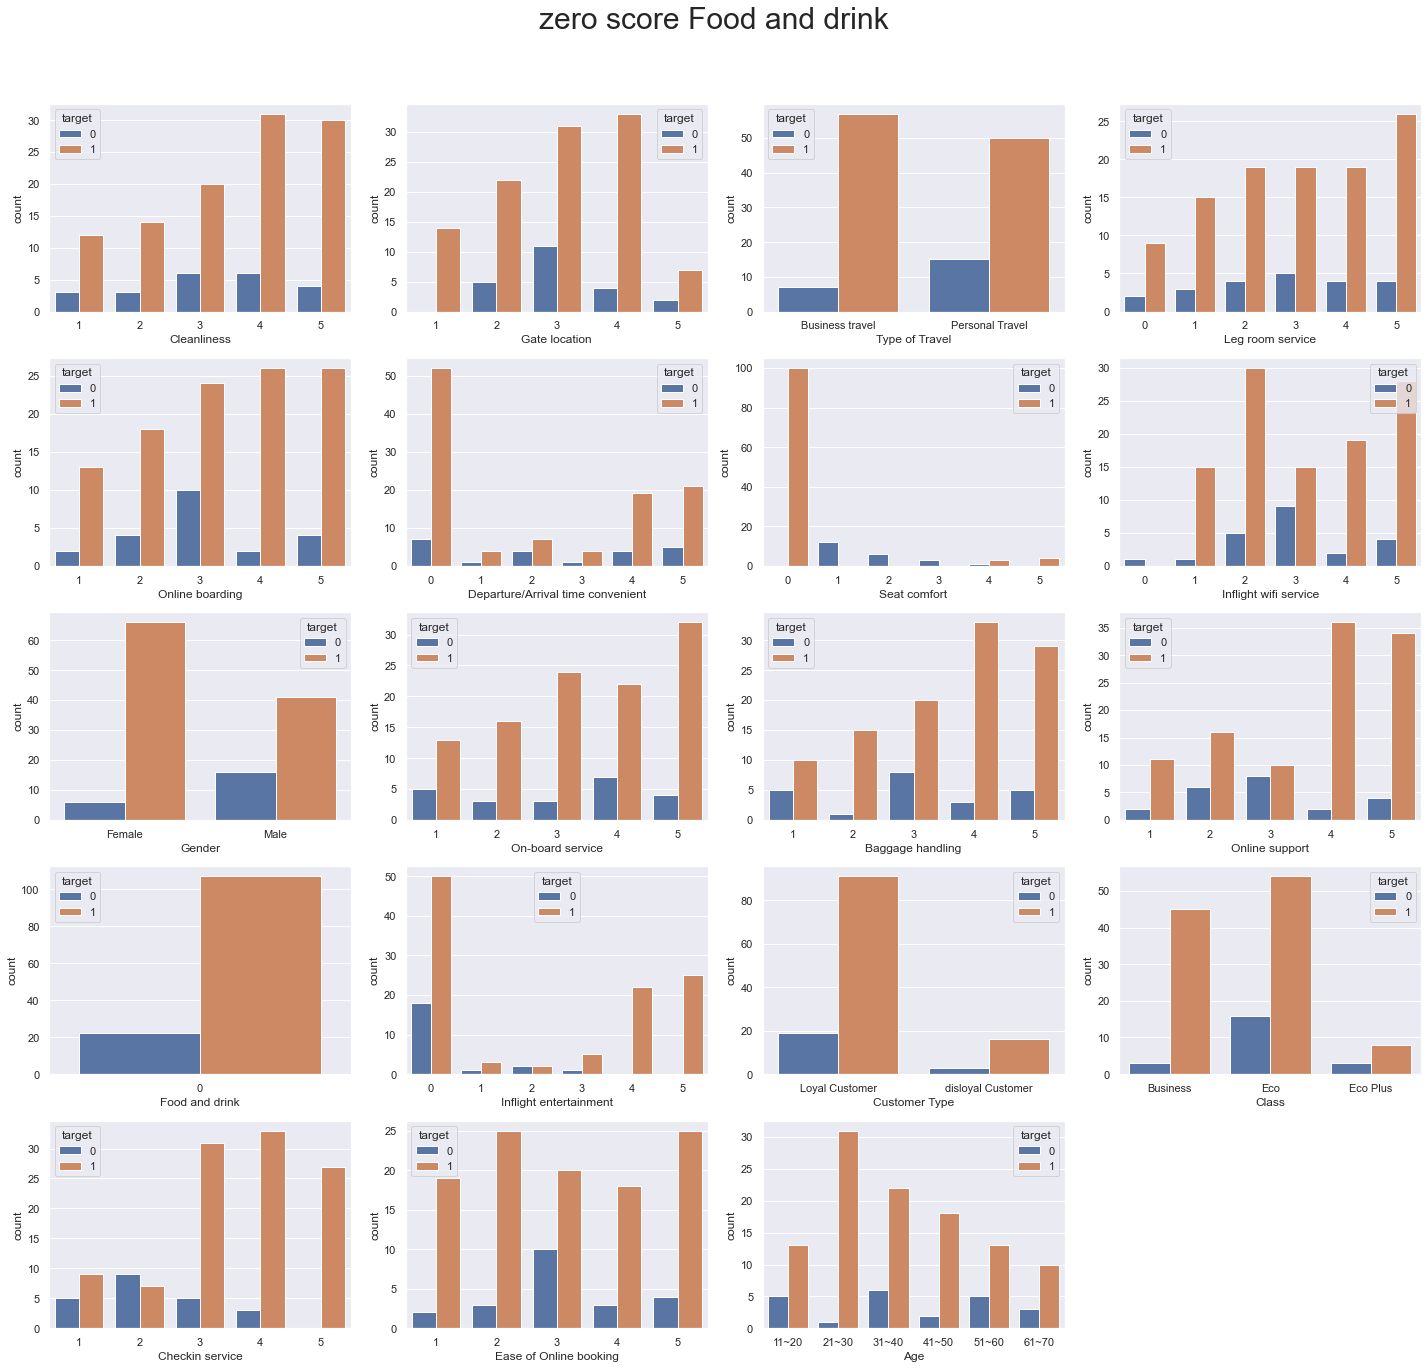

In [20]:
## 히스토그램을 사용해 범주의 빈도 확인
features = categorical_features

plt.figure(figsize = (20,20))
plt.suptitle('zero score Food and drink', fontsize = 30)

for i, feature in enumerate(features):
    plt.subplot(5,4,i+1)
    sns.countplot(x = feature, hue = 'target', data = df[df['Food and drink'] == 0]) 

plt.tight_layout(rect = [0, 0.03, 1, 0.95])
plt.show()

- 음식/음료 만족도가 0점인데 만족한 사람의 경향이 대강 보인다(miss marking)

`-` 출발/도착 시간 만족도도 대개 0점을 준다

`-` 기내 엔터테이먼트 만족도도 대개 0점을 준다

`-` 좌석 만족도도 대개 0점을 준다

`-` 기내 와이파이 만족도와 온라인 예매 편리성 만족도가 2점인 경우가 꽤 많다(추세에 맞지 않는다)

`-` 체크인 서비스 만족도도 의심이 간다

`-` 게이트 위치 만족도도 이상하다

`-` 나이대는 21\~30이 가장 많음

- 음식/음료 만족도가 0점인데 불만족인 사람은 진짜로 불만족인 것

`-` 다른 만족도 점수도 낮은편이다(높은 점수도 있음)

`-` 좌석 만족도가 4인 경우 Avg_service가 낮다면 미스 마킹

- 살짝 성리

`-` 일단 좌석 만족도가 0점 이면 마킹 실수이므로 만족으로 예측해야 한다

`-` 좌석 만족도가 0점이면 마킹 실수라고 무조건 믿어야 한다(근데 0점이 항목상 불만족을 뜻하는게 맞긴하나?)

`-` 음식/음료 만족도가 0점이면 마킹 실수이거나 진짜로 만족도가 0점(매우매우 불만족)일 수도 있다

`-` 이런 경우 좌석 만족도 피쳐를 확인한다

`-` 좌석 만족도가 낮다면(1, 2, 3) 마킹 실수가 아니라 진짜로 불만족한 경우이다

`-` 좌석 만족도가 5점이면 마킹 실수인데 4점은 조금 애매하다

##### 기내 엔터테이먼트 만족도

In [207]:
sum(df['Inflight entertainment'] == 0) ## 기내 엔터테이먼트 만족도가 0점인 사람은 73명

73

In [209]:
sum(df.loc[df['Inflight entertainment'] == 0,'target'])## 기내 엔터테이먼트 만족도가 0점인 사람은 73명이고 그 중 55명이 만족한다

55

In [227]:
sum(df[df['Inflight entertainment'] == 0]['Food and drink'] == 0), sum(df[df['Inflight entertainment'] == 0]['Food and drink'] == 5)

(68, 5)

<AxesSubplot:>

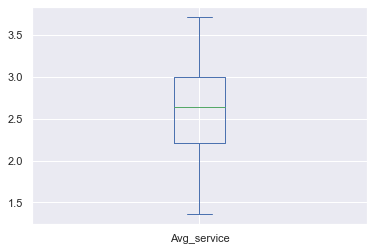

In [221]:
df.loc[df['Inflight entertainment'] == 0,:].query('target == 1').Avg_service.plot.box() ## 기내 엔터테이먼트 만족도가 0점인데 만족한 사람

`-` 좌석 만족도가 4인 경우 평균 만족도가 낮다면 만족

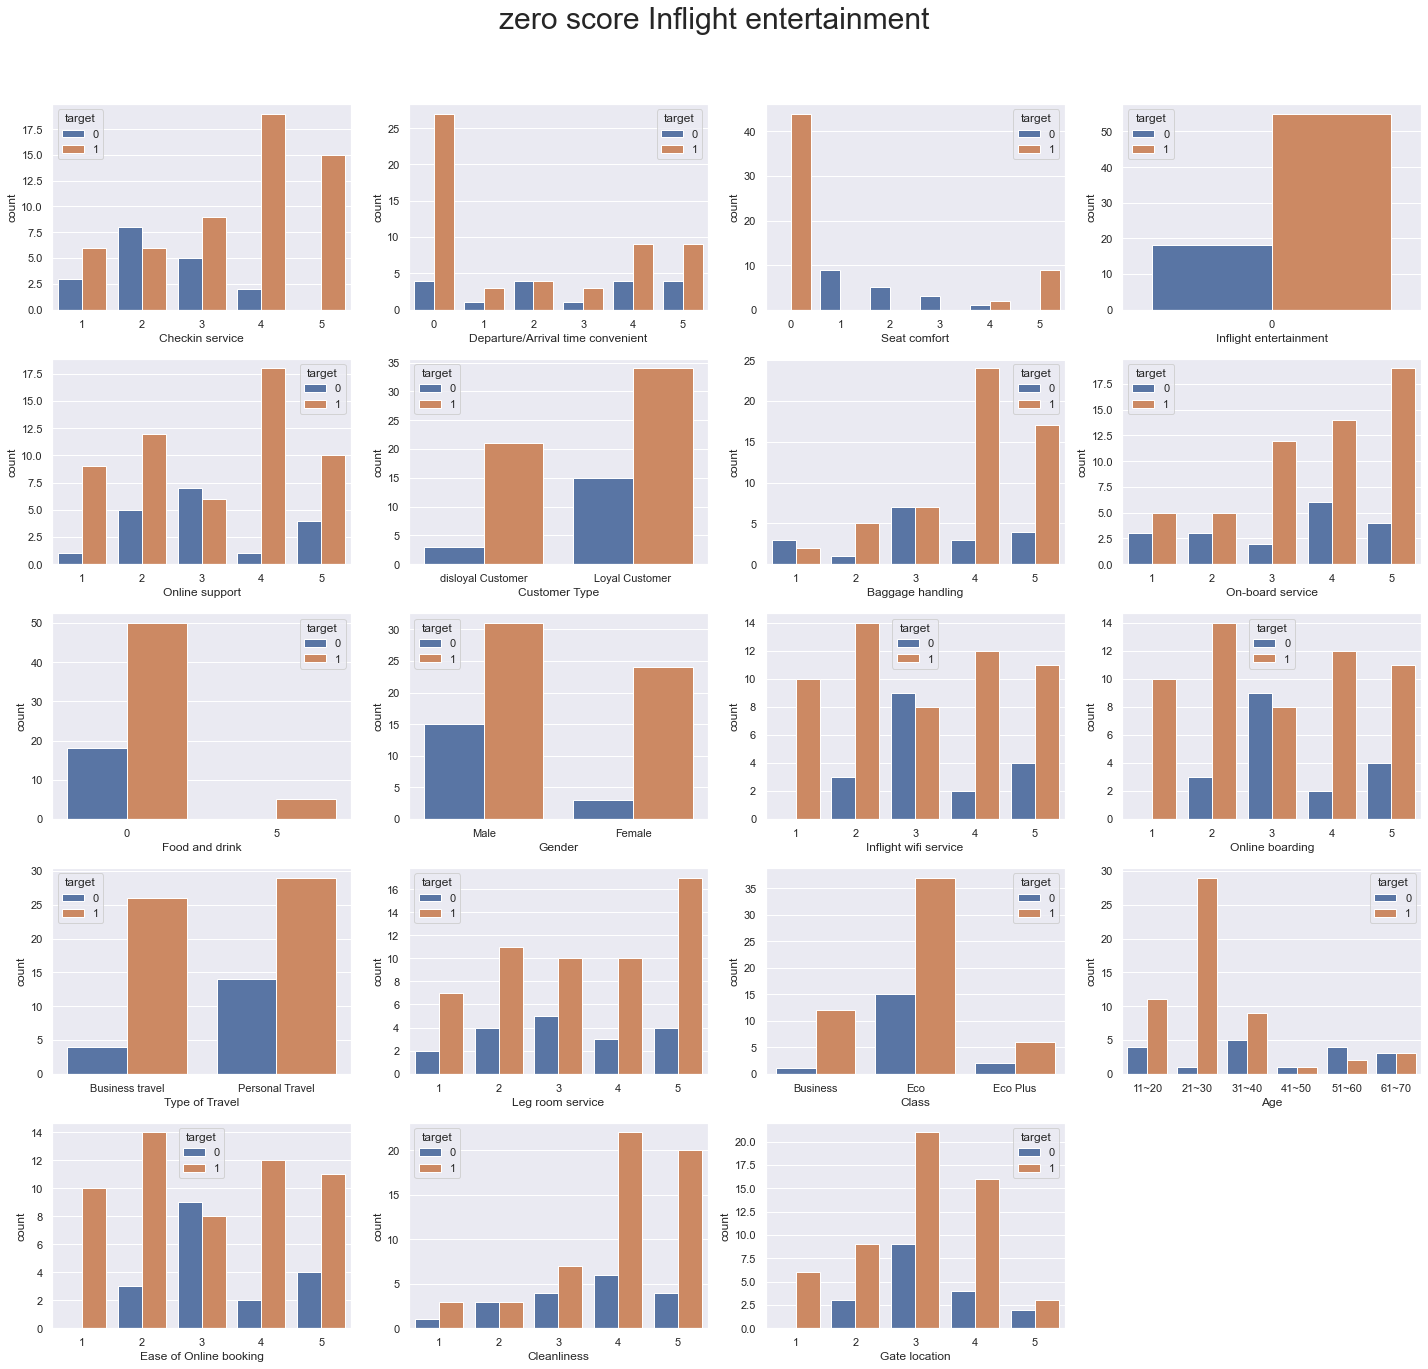

In [32]:
## 히스토그램을 사용해 범주의 빈도 확인
features = categorical_features

plt.figure(figsize = (20,20))
plt.suptitle('zero score Inflight entertainment', fontsize = 30)

for i, feature in enumerate(features):
    plt.subplot(5,4,i+1)
    sns.countplot(x = feature, hue = 'target', data = df[df['Inflight entertainment'] == 0]) 

plt.tight_layout(rect = [0, 0.03, 1, 0.95])
plt.show()

- 기내 엔터테이먼트 만족도가 0점인데 만족한 사람의 경향이 대강 보인다(miss marking)

`-` 출발/도착 시간 만족도도 대개 0점을 준다

`-` 음식/음료 만족도도 대개 0점을 준다

`-` 좌석 만족도도 대개 0점을 준다

`-` 기내 와이파이 만족도와 온라인 예매 편리성 만족도가 2점인 경우가 꽤 많다(추세에 맞지 않는다)

`-` 체크인 서비스 만족도도 의심이 간다

`-` 게이트 위치 만족도도 이상하다

`-` 나이대는 21\~30이 가장 많음

- 기내 엔터테이먼트 만족도가 0점인데 불만족인 사람은 진짜로 불만족인 것

`-` 다른 만족도 점수도 낮은편이다(높은 점수도 있음)

`-` `3점 ---> 그냥그래`

- 살짝 성리2

`-` 기내 엔터테이먼트 만족도가 0점이면 마킹 실수이거나 진짜로 만족도가 0점(매우매우 불만족)일 수도 있다

`-` 이런 경우 좌석 만족도 피쳐를 확인한다

`-` 좌석 만족도가 낮다면(1, 2, 3) 마킹 실수가 아니라 진짜로 불만족한 경우이다

`-` 좌석 만족도가 5점이면 마킹 실수인데 4점은 조금 애매하다

- 일단 대강 정리해보자

`-` 앞에서 살펴본 경우는 test 예측에 심각한 영향을 끼칠 수 있다

`-` 이상한 데이터가 train셋에만 포함된다면 모델이 학습을 이상하게 하고(사실 괜찮을 수 있긴함)

`-` valid셋에만 포함된다면 예측을 올바르게 하지 못한다(점수가 낮을수록 불만족인데 만족이라고 예측해야 함 ---> 이건 진짜 심각함)

`-` 위에서 0점은 마킹을 잘 못한 경우라고 했다

`-` 그런데 꼭 0점 말고 1점인 경우에도 마찬가지일 수 있다

`-` 좌석 만족도는 5점일경우 99% 만족하는 매우 중요한 피쳐이다

`-` 그런데 좌석 만족도가 0점인데 99%가 만족이다

`-` 이런 경우는 잘못 마킹했다고 밖에 설명할 수 없다

`-` 그리고 이런 경우가 좌석 만족도 뿐만 아닌 음식/음료 만족도, 기내 엔터테이먼트 만족도에도 동일하게 일어난다

`-` 미스 마킹이 문제라면 0점 말고도 1점 또는 5점인 경우에도 똑같이 일어날 수 있다

`-` 그런데 왜 미스 마킹을 하는 걸까?

`-` 혹시 연세가 어느정도 있으신 분들이 그런게 아닐까?

In [240]:
df.Age.value_counts() / sum(df.Age.value_counts())

41~50    0.216667
31~40    0.209333
21~30    0.204000
51~60    0.180667
11~20    0.113333
61~70    0.076000
Name: Age, dtype: float64

In [241]:
df[df['Seat comfort'] == 0].Age.value_counts() / sum(df[df['Seat comfort'] == 0].Age.value_counts())

21~30    0.292453
31~40    0.207547
41~50    0.169811
11~20    0.122642
51~60    0.122642
61~70    0.084906
Name: Age, dtype: float64

`-` 그렇지는 않았다 

`-` 오히려 21\~30이 많았다

- 다시 정리

`-` 좌석 만족도가 0점이라면 잘못 마킹한 것이므로 만족으로 예측하면 된다

`-` 음식/음료 만족도가 0점이라면 좌석 만족도를 보고 점수가 낮다면(1, 2, 3) 불만족 높다면(5) 긍정으로 예측

`-` 4인 경우 만족도 평균 점수가 낮으면(미스 마킹) 만족 높으면 불만족으로 예측

`-` 기내 엔터테이먼트 만족도도 음식/음료 만족도와 동일한 매커니즘

##### 출발/도착 시간 만족도

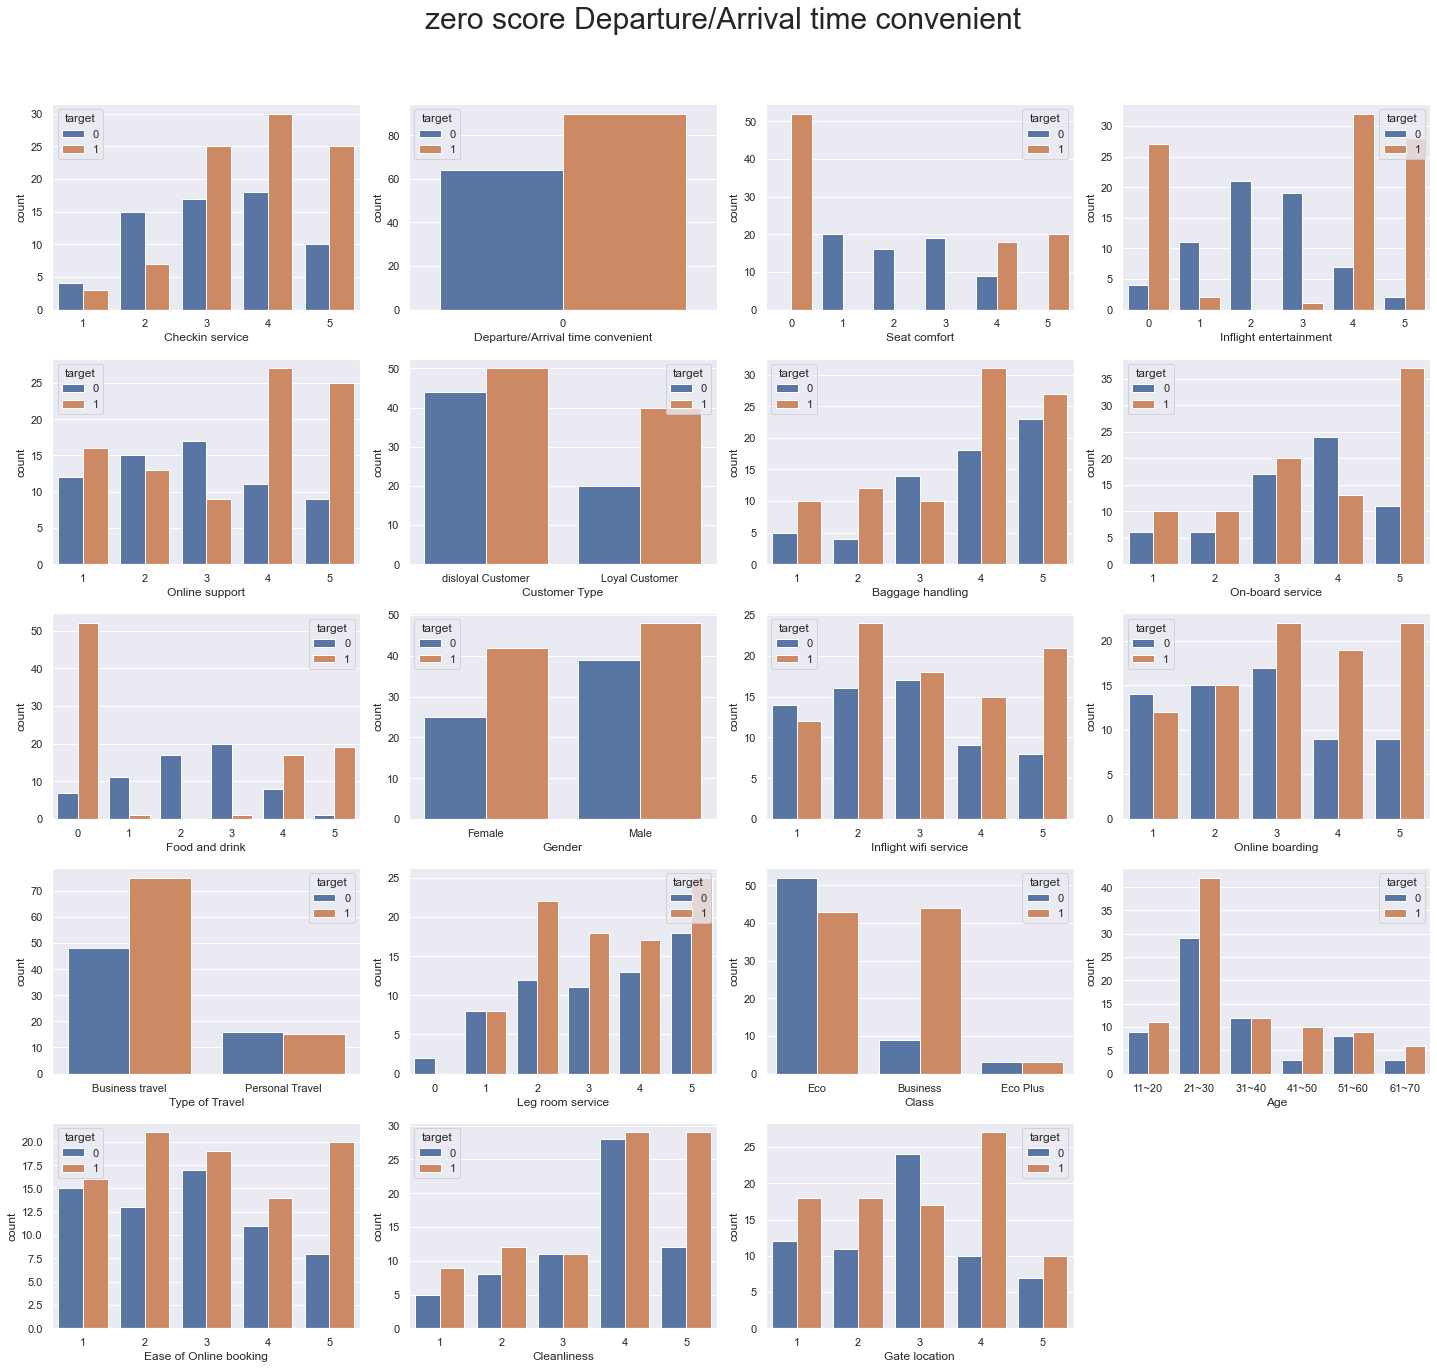

In [17]:
## 히스토그램을 사용해 범주의 빈도 확인
features = categorical_features

plt.figure(figsize = (20,20))
plt.suptitle('zero score Departure/Arrival time convenient', fontsize = 30)

for i, feature in enumerate(features):
    plt.subplot(5,4,i+1)
    sns.countplot(x = feature, hue = 'target', data = df[df['Departure/Arrival time convenient'] == 0]) 

plt.tight_layout(rect = [0, 0.03, 1, 0.95])
plt.show()

- 출발/도착 시간 만족도가 0점인데 만족한 사람의 경향이 대강 보인다(miss marking)

`-` 기내 엔터테이먼트 만족도는 대개 0점, 4점, 5점을 준다

`-` 음식/음료 만족도는 0점(60% 차지), 4점 ,5점을 준다

`-` 좌석 만족도와 음식/음료 만족도는 동일한 경향을 보인다

`-` 기내 와이파이 만족도와 온라인 예매 편리성 만족도가 2점인 경우가 꽤 많다(추세에 맞지 않는다)

`-` 체크인 서비스 만족도도 의심이 간다

`-` 게이트 위치 만족도도 이상하다

`-` 나이대는 21\~30이 가장 많음

- 기내 엔터테이먼트 만족도가 0점인데 불만족인 사람은 진짜로 불만족인 것

`-` 다른 만족도 점수도 낮은편이다(높은 점수도 있음)

#### 좌석 만족도 추가 탐색

`-` 위에서는 좌석 만족도, 음식/음료 만족도 등등, 0점일 때에 대해 알아봤다

`-` 이번에는 0점이 아닌 다른 점수(1점, 5점)인 경우도 알아보자

`-` 추가로 청결도 만족도(살짝 의심이 간다)와 게이트 위치 만족도(3인 경우가 이상하다)도 자세히 탐색하자

`-` 그런데 3점은 약간 이런 포지션임 $\to$ 좋은건 확실히 아닌데 2점 줄만큼 안좋지는 않았다

##### 좌석 만족도 1점

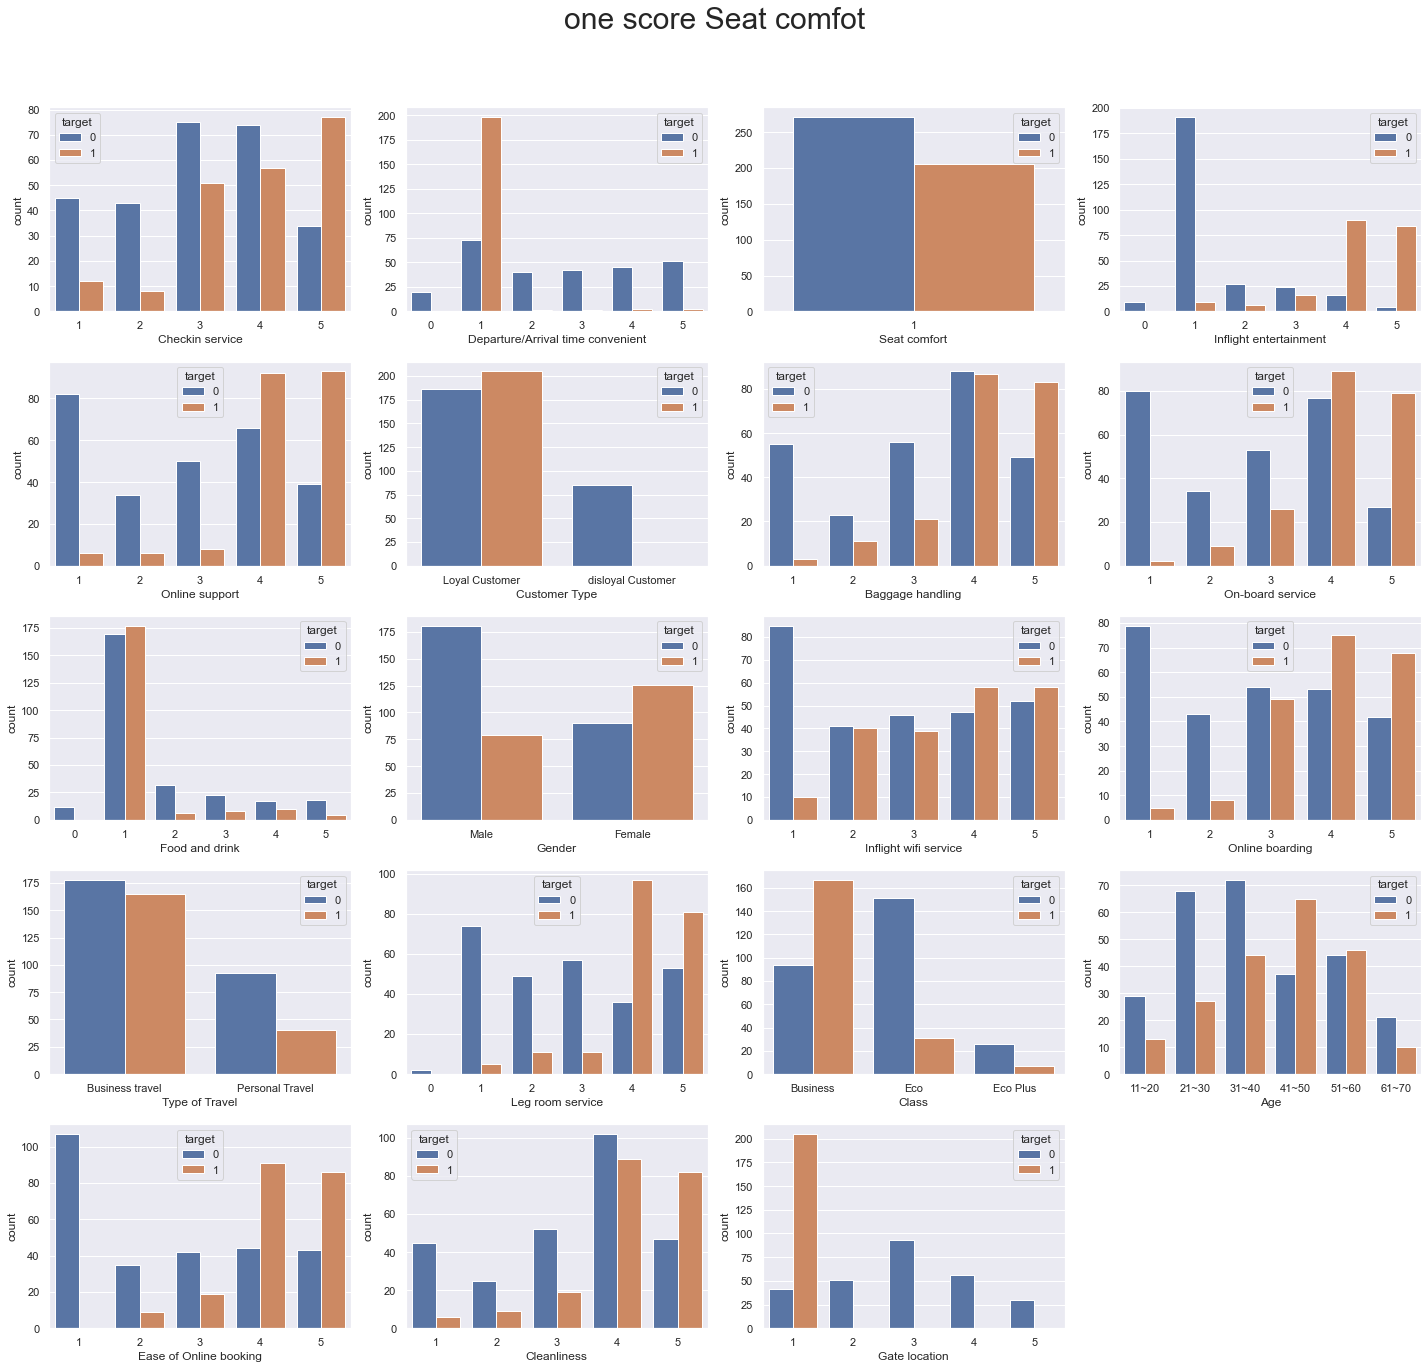

In [35]:
## 히스토그램을 사용해 범주의 빈도 확인
features = categorical_features

plt.figure(figsize = (20,20))
plt.suptitle('one score Seat comfot', fontsize = 30)

for i, feature in enumerate(features):
    plt.subplot(5,4,i+1)
    sns.countplot(x = feature, hue = 'target', data = df[df['Seat comfort'] == 1]) 

plt.tight_layout(rect = [0, 0.03, 1, 0.95])
plt.show()

- 좌석 만족도가 1점인데 만족한 사람의 경향이 대강 보인다(miss marking)

`-` 기내 엔터테이먼트 만족도는 대개 4점, 5점을 준다

`-` 음식/음료 만족도는 거의 1점을 준다(miss marking)

`-` 출발/도착 시간 만족도는 1점을 준다(miss marking)

`-` 게이트 위치 만족도도 1점을 준다(miss marking)

`-` 나머지 만족도변수는 상식적이다(낮으면 만족 비율 낮고 높으면 만족 비율 높음)

- 좌석 만족도가 1점인데 불만족인 사람은 진짜로 불만족인 것

`-` 기내 엔터테이먼트 만족도는 대개 1점이다

`-` 음식/음료 만족도는 거의 1점을 준다

`-` 다른 만족도도 보통 1점을 준다

<AxesSubplot:xlabel='Avg_service', ylabel='Count'>

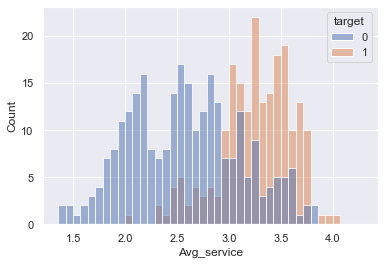

In [38]:
sns.histplot(x = 'Avg_service', hue = 'target', binwidth = 1/len(service_features), data = df[df['Seat comfort'] == 1])

`-` 불만족인 경우 쌍봉 분포를 띈다

`-` 만족인 경우는 왼쪽으로 꼬리가 긴 분포(전체 표본으로 시각화했을 때와 동일한 분포)

`-` 좌석만족도는 가장 중요한 피쳐니까 2점, 3점, 4점인 경우에 대해서도 시각화하자

##### 좌석 만족도 2점

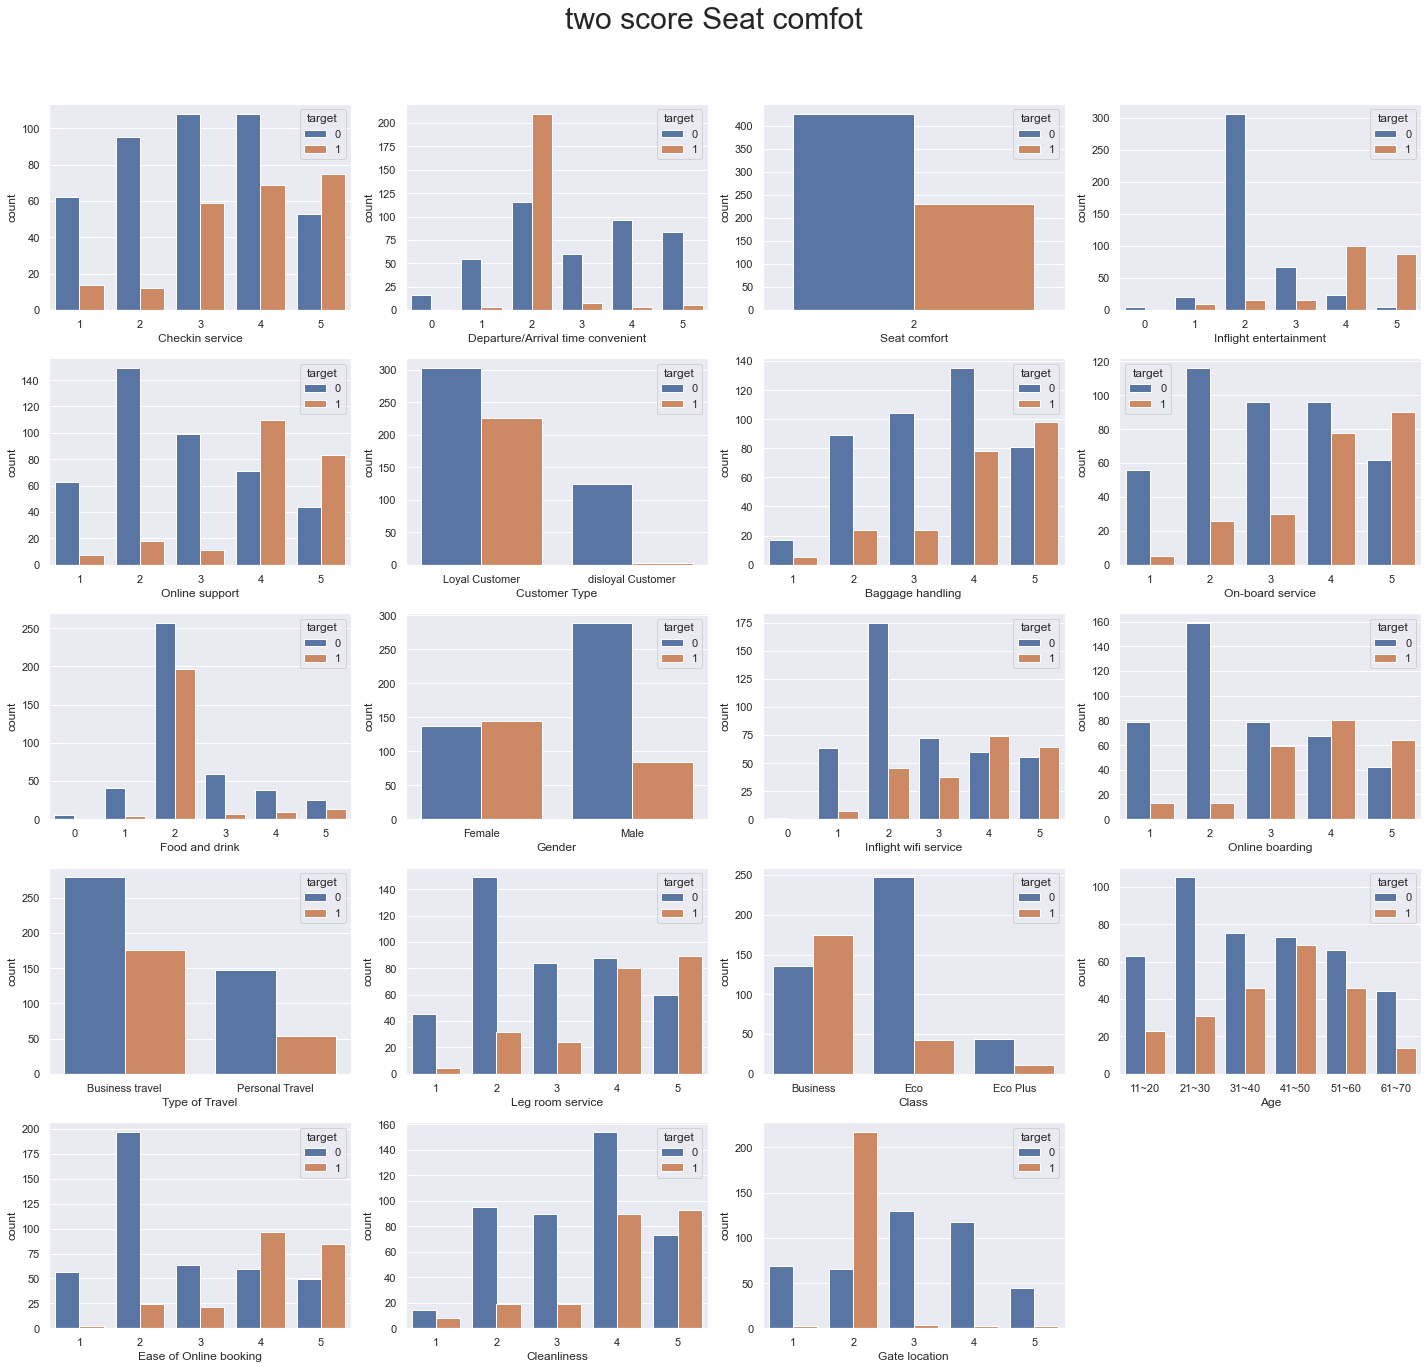

In [40]:
## 히스토그램을 사용해 범주의 빈도 확인
features = categorical_features

plt.figure(figsize = (20,20))
plt.suptitle('two score Seat comfot', fontsize = 30)

for i, feature in enumerate(features):
    plt.subplot(5,4,i+1)
    sns.countplot(x = feature, hue = 'target', data = df[df['Seat comfort'] == 2]) 

plt.tight_layout(rect = [0, 0.03, 1, 0.95])
plt.show()

- 좌석 만족도가 2점인데 만족한 사람의 경향이 대강 보인다

`-` 좌석만족도가 1점일 때 다른 만족도 점수도 똑같이 1점을 주는 경향이 있는데 2점인 경우도 동일하다

`-` 출발/도착 시간, 음식/음료, 게이트 위치 만족도 피쳐는 좌석 만족도와 동일한 점수가 대부분을 차지한다

- 좌석 만족도가 2점인데 불만족인 사람은 진짜로 불만족인 것

`-` 기내 엔터테인먼트, 기내 와이파이, 온라인 관련 피쳐, 룸서비스 만족도 피쳐는 좌석 만족도와 동일한 점수가 대부분을 차지한다

- 좌석 만족도 피쳐와 상관없는 피쳐

`-` 체크인 서비스, 수하물 처리, 체크인 서비스, 탑승 서비스 만족도

<AxesSubplot:xlabel='Avg_service', ylabel='Count'>

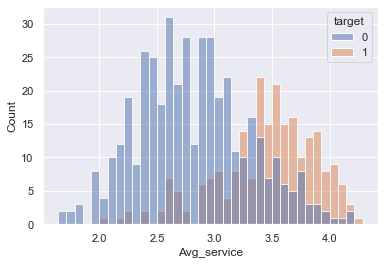

In [45]:
sns.histplot(x = 'Avg_service', hue = 'target', binwidth = 1/len(service_features), data = df[df['Seat comfort'] == 2])

`-` 불만족은 무난한 종모양, 만족은 왼쪽으로 꼬리가 긴 분포

##### 좌석 만족도 3점

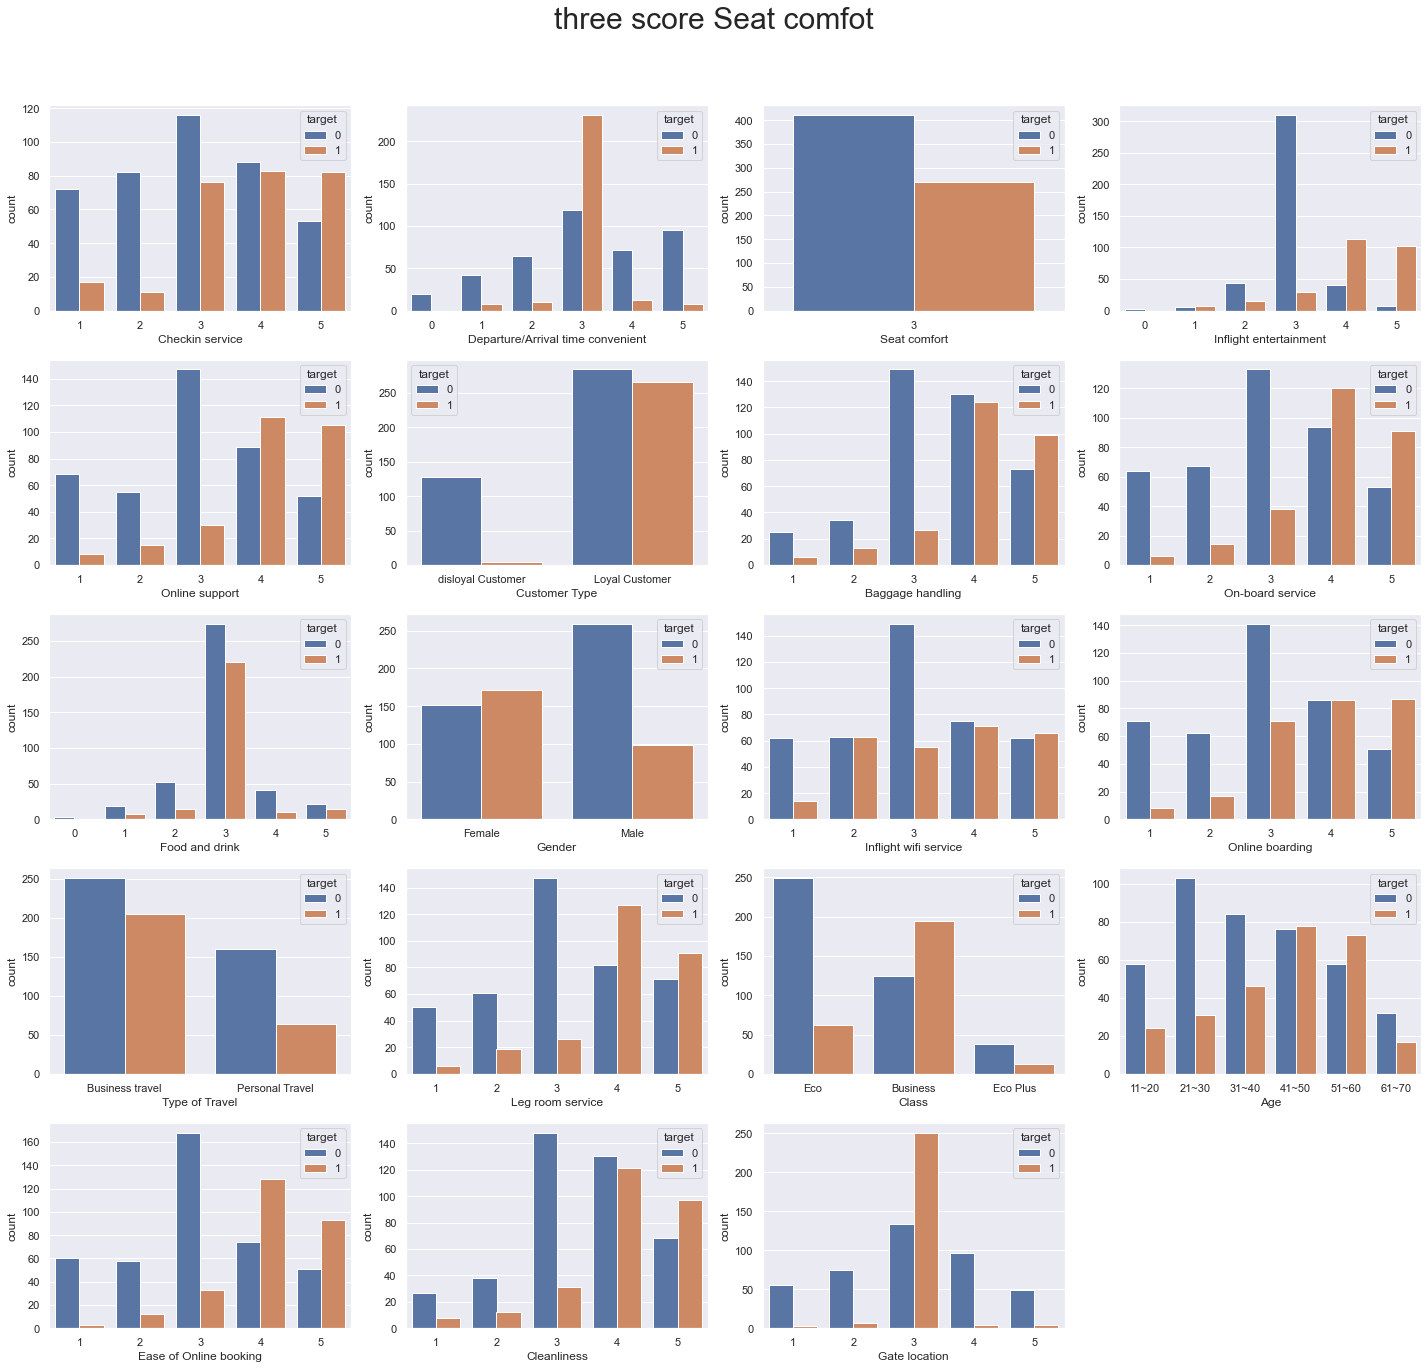

In [41]:
## 히스토그램을 사용해 범주의 빈도 확인
features = categorical_features

plt.figure(figsize = (20,20))
plt.suptitle('three score Seat comfot', fontsize = 30)

for i, feature in enumerate(features):
    plt.subplot(5,4,i+1)
    sns.countplot(x = feature, hue = 'target', data = df[df['Seat comfort'] == 3]) 

plt.tight_layout(rect = [0, 0.03, 1, 0.95])
plt.show()

`-` 좌석 만족도가 2점일 때와 동일한 양상을 보인다

<AxesSubplot:xlabel='Avg_service', ylabel='Count'>

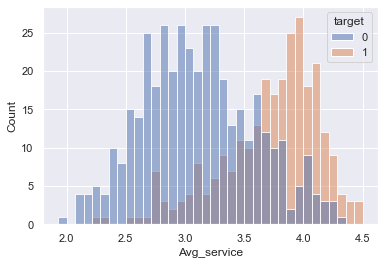

In [46]:
sns.histplot(x = 'Avg_service', hue = 'target', binwidth = 1/len(service_features), data = df[df['Seat comfort'] == 3])

`-` 평균 만족도 점수는 좌석 만족도가 2점일 때와 거의 동일한 양상을 보인다(만족했을때 평균 만족도 분포의 꼬리가 더 길어짐)

##### 좌석 만족도 4점

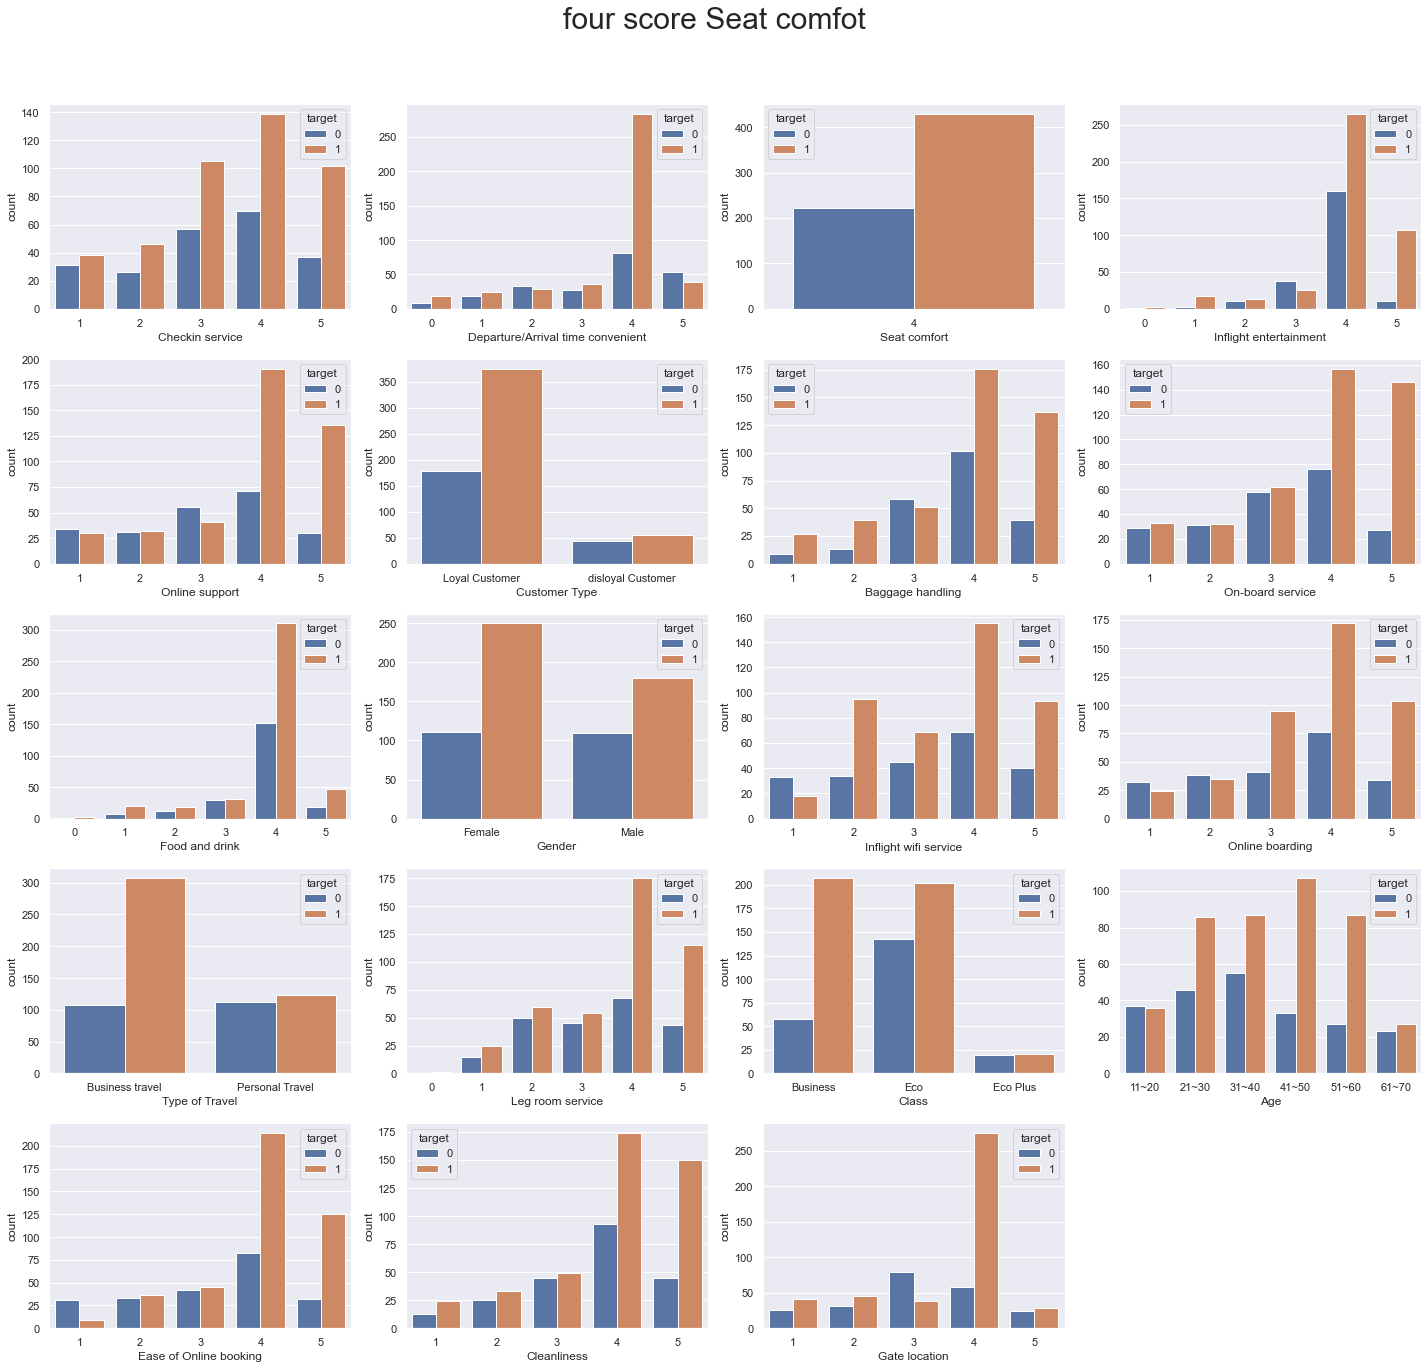

In [43]:
## 히스토그램을 사용해 범주의 빈도 확인
features = categorical_features

plt.figure(figsize = (20,20))
plt.suptitle('four score Seat comfot', fontsize = 30)

for i, feature in enumerate(features):
    plt.subplot(5,4,i+1)
    sns.countplot(x = feature, hue = 'target', data = df[df['Seat comfort'] == 4]) 

plt.tight_layout(rect = [0, 0.03, 1, 0.95])
plt.show()

`-` 좌석 만족도가 3점일 때와 비슷한 양상을 보인다(변동성이 커짐)

`-` 좌석 만족도가 5점일때도 시각화하자

<AxesSubplot:xlabel='Avg_service', ylabel='Count'>

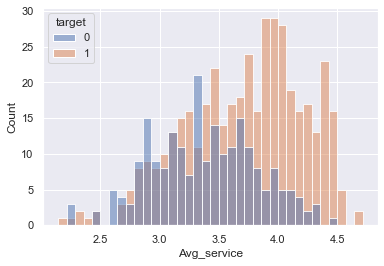

In [48]:
sns.histplot(x = 'Avg_service', hue = 'target', binwidth = 1/len(service_features), data = df[df['Seat comfort'] == 4])

`-` 좌석 만족도가 2점일 때와 비슷한 양상을 보임

##### 좌석 만족도 5점

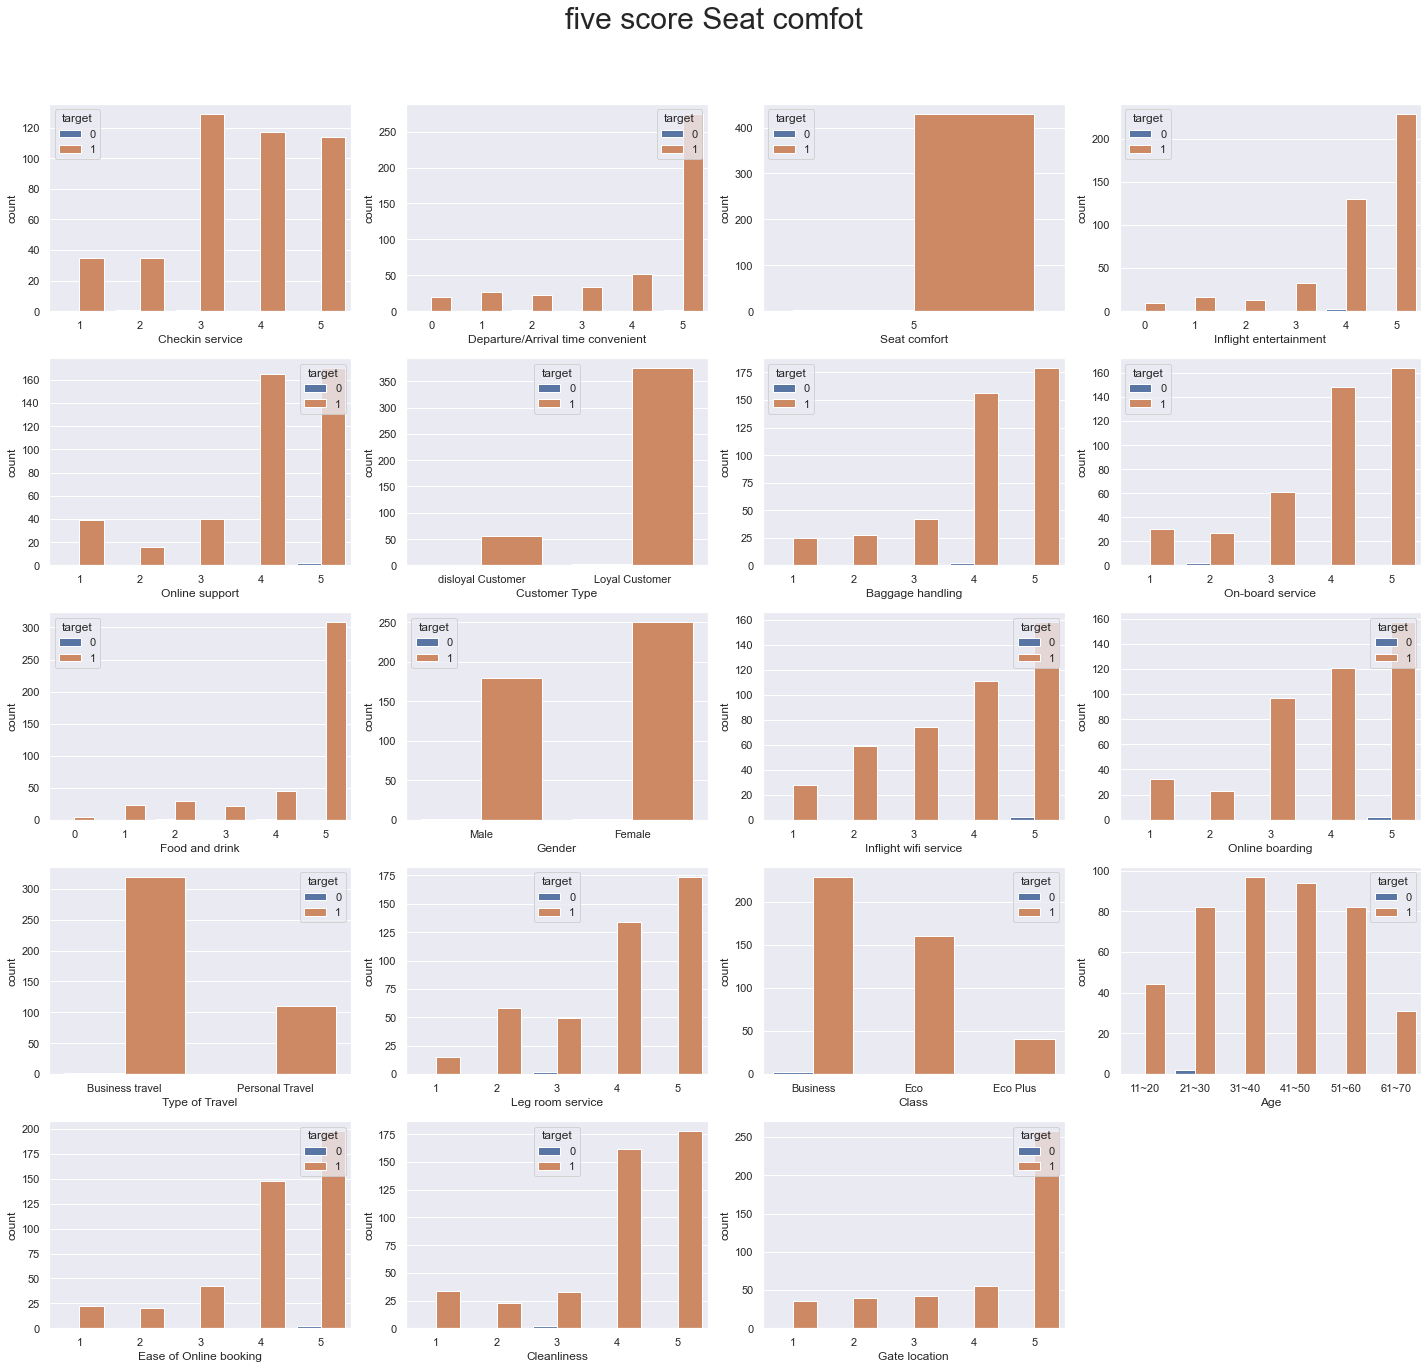

In [44]:
## 히스토그램을 사용해 범주의 빈도 확인
features = categorical_features

plt.figure(figsize = (20,20))
plt.suptitle('five score Seat comfot', fontsize = 30)

for i, feature in enumerate(features):
    plt.subplot(5,4,i+1)
    sns.countplot(x = feature, hue = 'target', data = df[df['Seat comfort'] == 5]) 

plt.tight_layout(rect = [0, 0.03, 1, 0.95])
plt.show()

<AxesSubplot:xlabel='Avg_service', ylabel='Count'>

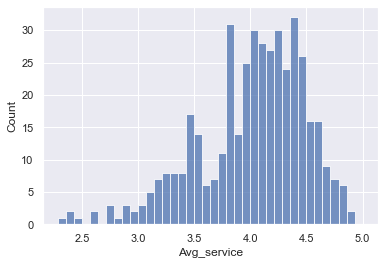

In [50]:
sns.histplot(x = 'Avg_service', binwidth = 1/len(service_features), data = df[df['Seat comfort'] == 5])

`-` 좌석 만족도가 3점일때와 비슷한 분포(참고로 1명 빼고 모두 만족임)

##### 좌석 만족도에 따른 시각화 결과

- 좌석 만족도 점수에 따라 시각화한 결과를 정리하자

`-` 일단 사람들은 동일한 점수를 주는 경향이 있다(편의상 좌석 만족도를 기준으로 삼자)

`-` 만족이든 불만족이든 좌석 만족도랑 대개 동일한 점수를 주려고 한다

`-` 이러한 패턴에서 벗어나는 피쳐는 체크인 서비스, 수하물 처리, 체크인 서비스, 탑승 서비스 만족도이다

`-` 만족/불만족에 따라 다른 경향을 보이는 피쳐도 다시 정리하자

- 만족인 경우

`-` 출발/도착 시간, 음식/음료, 게이트 위치 만족도는 좌석 만족도와 동일한 점수를 주려는 경향이 있음

`-` 게이트 위치는 좌석 만족도가 0점일 때를 제외하면 거의 동일한 점수

`-` 좌석 만족도가 0점일 때 기내 엔터테이먼트 만족도(0점이 과반수, 4점과 5점이 나머지 차지)

`-` 나머지 피쳐는 대략적으로 1점, 2점, 3점은 카운팅이 적고 4점과 5점은 카운팅이 많은 경향을 보임 

- 불만족인 경우

`-` 기내 엔터테이먼트 만족도는 0점과 5점일 때를 제외하곤(1명 빼고 만족이어서 불만족이 없다) 대부분을 좌석 만족도와 같은 점수가 차지함

`-` ex) 불만족인 사람의 좌석 만족도가 3점이면 기내 엔터테이먼트도 대부분 3점이다

`-` Online 관련 변수와 룸서비스, 출발/도착 시간, 음식/음료 만족도의 최대 카운팅 범주값은 좌석 만족도 점수와 동일함(0점과 5점은 제외) 

`-` 해당 점수를 기준으로 범주형 변수이긴 하지만 대개 종모양을 띈다

- 어떻게 전처리해야 하는가?

`-` 좌석 만족도를 기준으로 나누어 모델링을 해보자

`-` 좌석 만족도가 0점이나 5점이면 무조건 만족이라고 생각하자

`-` 기내 엔터테이먼트 만족도도 5점이면 그냥 만족이라고 생각할까?

- 좌석 만족도 1점

`-` 좌석 만족도가 1점일 땐 게이트 위치 만족도(대체재: 출발/도착 시간 만족도)가 1점이 아니면 불만족이다

`-` 또한 충성 고객이 아니면 불만족이다

`-` 좌석 만족도 1점, 출발/도착 시간 만족도가 1점일 때 음식/음료 만족도가 1점이 아니면 만족이다

- 좌석 만족도 2점

`-` 좌석 만족도가 2점일 땐 게이트 위치 만족도(대체재: 출발/도착 시간 만족도)가 2점이 아니면 불만족이다

`-` 또한 충성 고객이 아니면 불만족이다

- 좌석 만족도 3점

`-` 좌석 만족도가 3점일 땐 게이트 위치 만족도(대체재: 출발/도착 시간 만족도)가 3점이 아니면 불만족이다

`-` 또한 충성 고객이 아니면 불만족이다

- 좌석 만족도 4점

`-` 모르겠다

### 양적 변수 시각화

In [64]:
numeric_features = ['Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

#### 비행 거리

<AxesSubplot:xlabel='Flight Distance', ylabel='Count'>

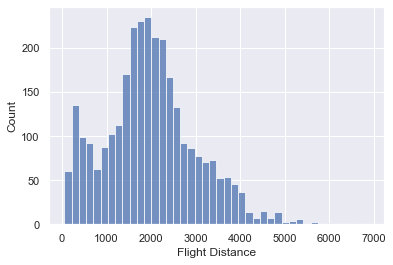

In [53]:
sns.histplot(x = 'Flight Distance', data = df)

<AxesSubplot:xlabel='Flight Distance', ylabel='Count'>

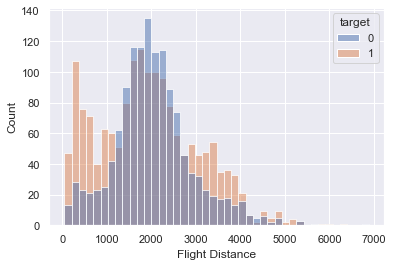

In [51]:
sns.histplot(x = 'Flight Distance', hue = 'target', alpha = 0.5, data = df)

`-` 비행거리가 짧은 경우 만족한 경우가 더 많다

#### 도착 시간 딜레이

`-` 딜레이 관련 변수는 0분이 너무 많아서 이를 따로 시각화하겠다

In [84]:
sum(df['Departure Delay in Minutes'] == 0)

1705

`-` 1705명의 경우 도착 시간 딜레이가 0분임

- 딜레이가 없는 경우

<AxesSubplot:xlabel='Departure Delay in Minutes', ylabel='count'>

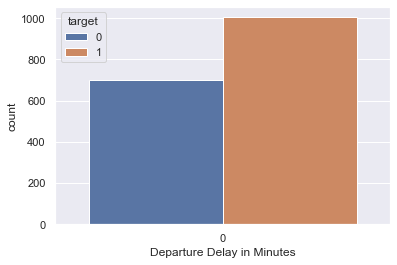

In [86]:
sns.countplot(x = 'Departure Delay in Minutes', hue = 'target', data = df.loc[df['Departure Delay in Minutes'] == 0,:]) 

`-` 딜레이가 없는 경우 만족과 불만족 비율은 대략 58%, 42% 정도로 큰 차이가 없긴 하다

- 딜레이가 있는 경우

<AxesSubplot:xlabel='target', ylabel='Departure Delay in Minutes'>

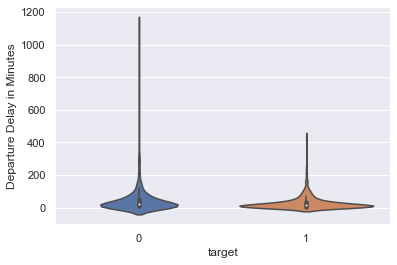

In [147]:
sns.violinplot(y = 'Departure Delay in Minutes', x = 'target', data = df.loc[df['Departure Delay in Minutes'] > 0,:])

`-` 딜레이 시간에 따라 만족, 불만족이 판가름 되지는 않는다?

`-` 딜레이가 많이 되면 불만족인 비율이 앞도적으로 높을줄 알았는데 아니었다...

`-` 딜레이가 200분이 넘어가는데도 만족을 준 사람이 있다!!!

#### 출발 시간 딜레이

`-` 도착 시간 딜레이와 비슷한 양상을 보인다

In [95]:
sum(df['Arrival Delay in Minutes'] == 0)

1661

`-` 1661명의 경우 출발 시간 딜레이가 0분임

- 딜레이가 없는 경우

In [143]:
1000/1661

0.6020469596628537

<AxesSubplot:xlabel='Arrival Delay in Minutes', ylabel='count'>

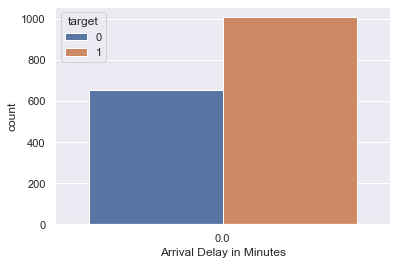

In [93]:
sns.countplot(x = 'Arrival Delay in Minutes', hue = 'target', data = df.loc[df['Arrival Delay in Minutes'] == 0,:]) 

`-` 딜레이가 없는 경우 만족과 불만족 비율은 대략 60%, 40% 이므로 어느 정도 차이가 있다

- 딜레이가 있는 경우

<AxesSubplot:xlabel='target', ylabel='Arrival Delay in Minutes'>

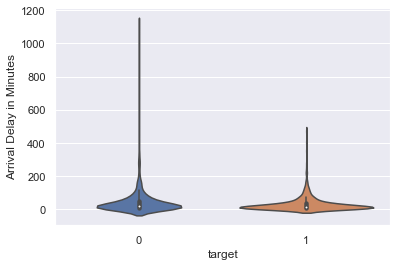

In [150]:
sns.violinplot(y = 'Arrival Delay in Minutes', x = 'target', data = df.loc[df['Arrival Delay in Minutes'] > 0,:])

`-` 딜레이 시간에 따라 만족, 불만족이 판가름 되지는 않는다

`-` 딜레이가 200분이 넘어가는데도 만족을 준 사람이 있다!!!

### 상관관계 시각화

In [135]:
corr_df = df.copy()

In [137]:
corr_df.Age = corr_df.Age.map(dict(zip([str((i-1)*10 + 1) + '~' + str(i*10) for i in range(2,8)], [i for i in range(1,7)]))).astype(int)

In [138]:
## 먼저 상관계수 계산을 위해 텍스트 형식의 데이터를 숫자로 변환
corr_df[corr_df.columns[corr_df.dtypes == 'O']] = corr_df[corr_df.columns[corr_df.dtypes == 'O']].astype(str).apply(LabelEncoder().fit_transform)

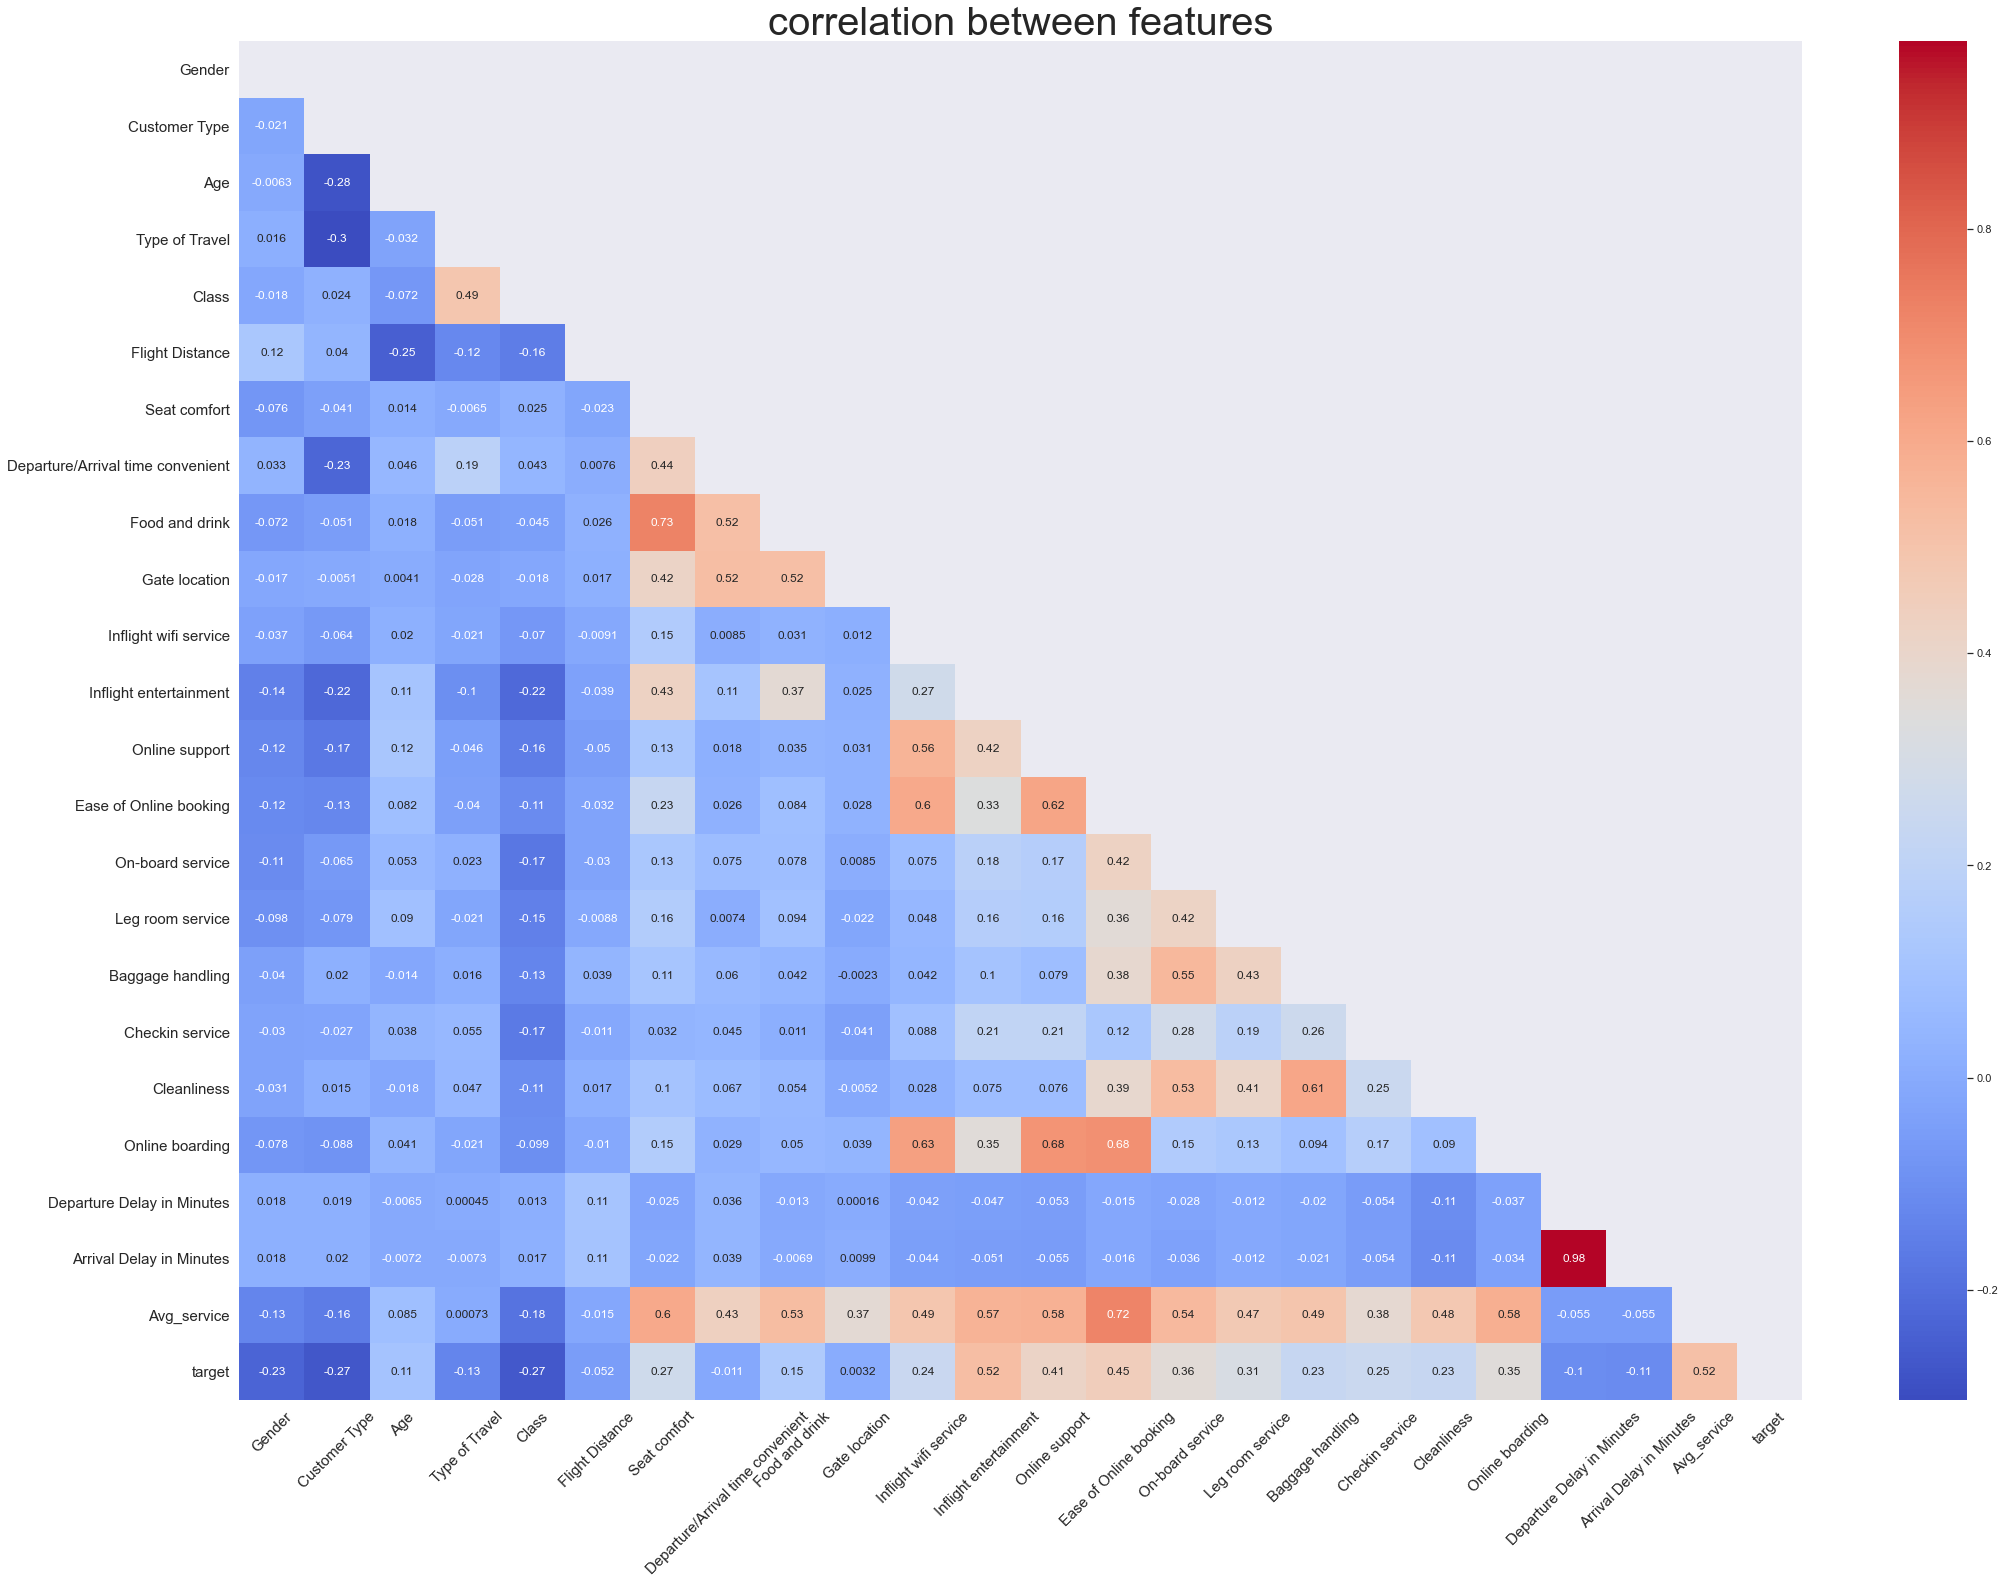

In [140]:
plt.figure(figsize = (35,25))

heat_table = corr_df.corr()
mask = np.zeros_like(heat_table)
mask[np.triu_indices_from(mask)] = True
heatmap_ax = sns.heatmap(heat_table, annot = True, mask = mask, cmap = 'coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize = 15, rotation = 45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize = 15)
plt.title('correlation between features', fontsize = 40)
plt.show()

`-` 출발 시간 딜레이와 도착 시간 딜레이간의 상관계수는 거의 1이다

`-` 그 외에도 서로 상관관계가 강한 피쳐들이 보인다